# Exploring Meta-T Tetris data from Lindstedt and Gray (2015; 2019)
-------

### Notes on data 

- Download @ https://osf.io/78ebg/
- Three files:
    - "eps" describes the games of 241 participants at the episodic level (behavioural data and scores at each zoid)
    - "gms" provides summary stats (e.g., score, zoid sequence) for each game played in "eps"
    - "quals" includes episodic and summary data for tournament qualifier games played by 44 participants
- All variables described in 2017 paper by Sibert, Lindstedt, and Gray; doi number 10.1111/tops.12225
    - 85 columns in "eps"
    - 15 columns in "gms"
    - 89 columns in "quals"

Import libraries

In [1]:
import os
import sys
import socket
import pingouin as pg

from modules import *

# initialise selected plotting parameters
sns_styleset()

/home/ozvar/Dropbox/venvs/hmm_analysis/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/home/ozvar/Dropbox/venvs/hmm_analysis/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Import data

In [2]:
df = pd.read_csv(os.path.join('data', 'pca_eps.csv'), header=0, sep=',', low_memory=False)

In [3]:
len(df)

271436

In [4]:
df.head()

ts event_type  SID ECID            session       game_type  \
0  78.4979    EP_SUMM  101  NIL  2013_6_6_12-23-50  pop_assessment   
1  88.2783    EP_SUMM  101  NIL  2013_6_6_12-23-50  pop_assessment   
2  92.9668    EP_SUMM  101  NIL  2013_6_6_12-23-50  pop_assessment   
3  99.3719    EP_SUMM  101  NIL  2013_6_6_12-23-50  pop_assessment   
4 106.9975    EP_SUMM  101  NIL  2013_6_6_12-23-50  pop_assessment   

   game_number  episode_number  level  score  lines_cleared curr_zoid  \
0            1               0      0     16              0         O   
1            1               1      0     24              0         S   
2            1               2      0     38              0         O   
3            1               3      0     51              0         J   
4            1               4      0     58              0         S   

  next_zoid  danger_mode  rots  trans  path_length  min_rots  min_trans  \
0         S        False     0      4            4         0          4   
1         O        False     1      7            8         1          3   
2         J        False     0     10           10         0          4   
3         S        False     1      4            5         1          1   
4         O        False     3      3            6         1          3   

   min_path  min_rots_diff  min_trans_diff  min_path_diff  u_drops  s_drops  \
0         4              0               0              0       17        2   
1         4              0               4              4        8       10   
2         4              0               6              6       15        4   
3         2              0               3              3       13        6   
4         4              2               0              2        8        8   

   prop_u_drops  initial_lat  drop_lat  avg_lat  tetrises_game  \
0        0.8947          724      2083 416.6000              0   
1        0.4444          606      4671 505.5455              0   
2        0.7895          701      4061 369.1818              0   
3        0.6842          902      2089 621.0000              0   
4        0.5000          857      6591 820.8889              0   

   tetrises_level  zoid_rot  zoid_col  zoid_row  all_diffs  all_ht  all_trans  \
0               0         0         0         2         -2       4          4   
1               0         1         1         4         -2       9         10   
2               0         0         8         2          0      13         14   
3               0         1         2         3          0      16         14   
4               0         1         1         6          0      20         18   

   cd_1  cd_2  cd_3  cd_4  cd_5  cd_6  cd_7  cd_8  cd_9  cleared  col_trans  \
0     0    -2     0     0     0     0     0     0     0        0          2   
1     2    -1    -3     0     0     0     0     0     0        0          4   
2     2    -1    -3     0     0     0     0     2     0        0          6   
3     2    -1     0    -3     0     0     0     2     0        0          6   
4     4    -1    -2    -3     0     0     0     2     0        0          6   

   column_9  cuml_cleared  cuml_eroded  cuml_wells  d_all_ht  d_max_ht  \
0         0             0            0           0         4         2   
1         0             0            0           3         5         2   
2         2             0            0           3         4         0   
3         2             0            0           3         3         0   
4         2             0            0          10         4         2   

   d_mean_ht  d_pits  deep_wells  eroded_cells  full_cells  jaggedness  \
0     0.4000       0           0             0           4           2   
1     0.5000       1           2             0           8           6   
2     0.4000       0           2             0          12           8   
3     0.3000      -1           2             0          16           8   
4     0.4000       0           4             0  

## Plot distributions of salient variables

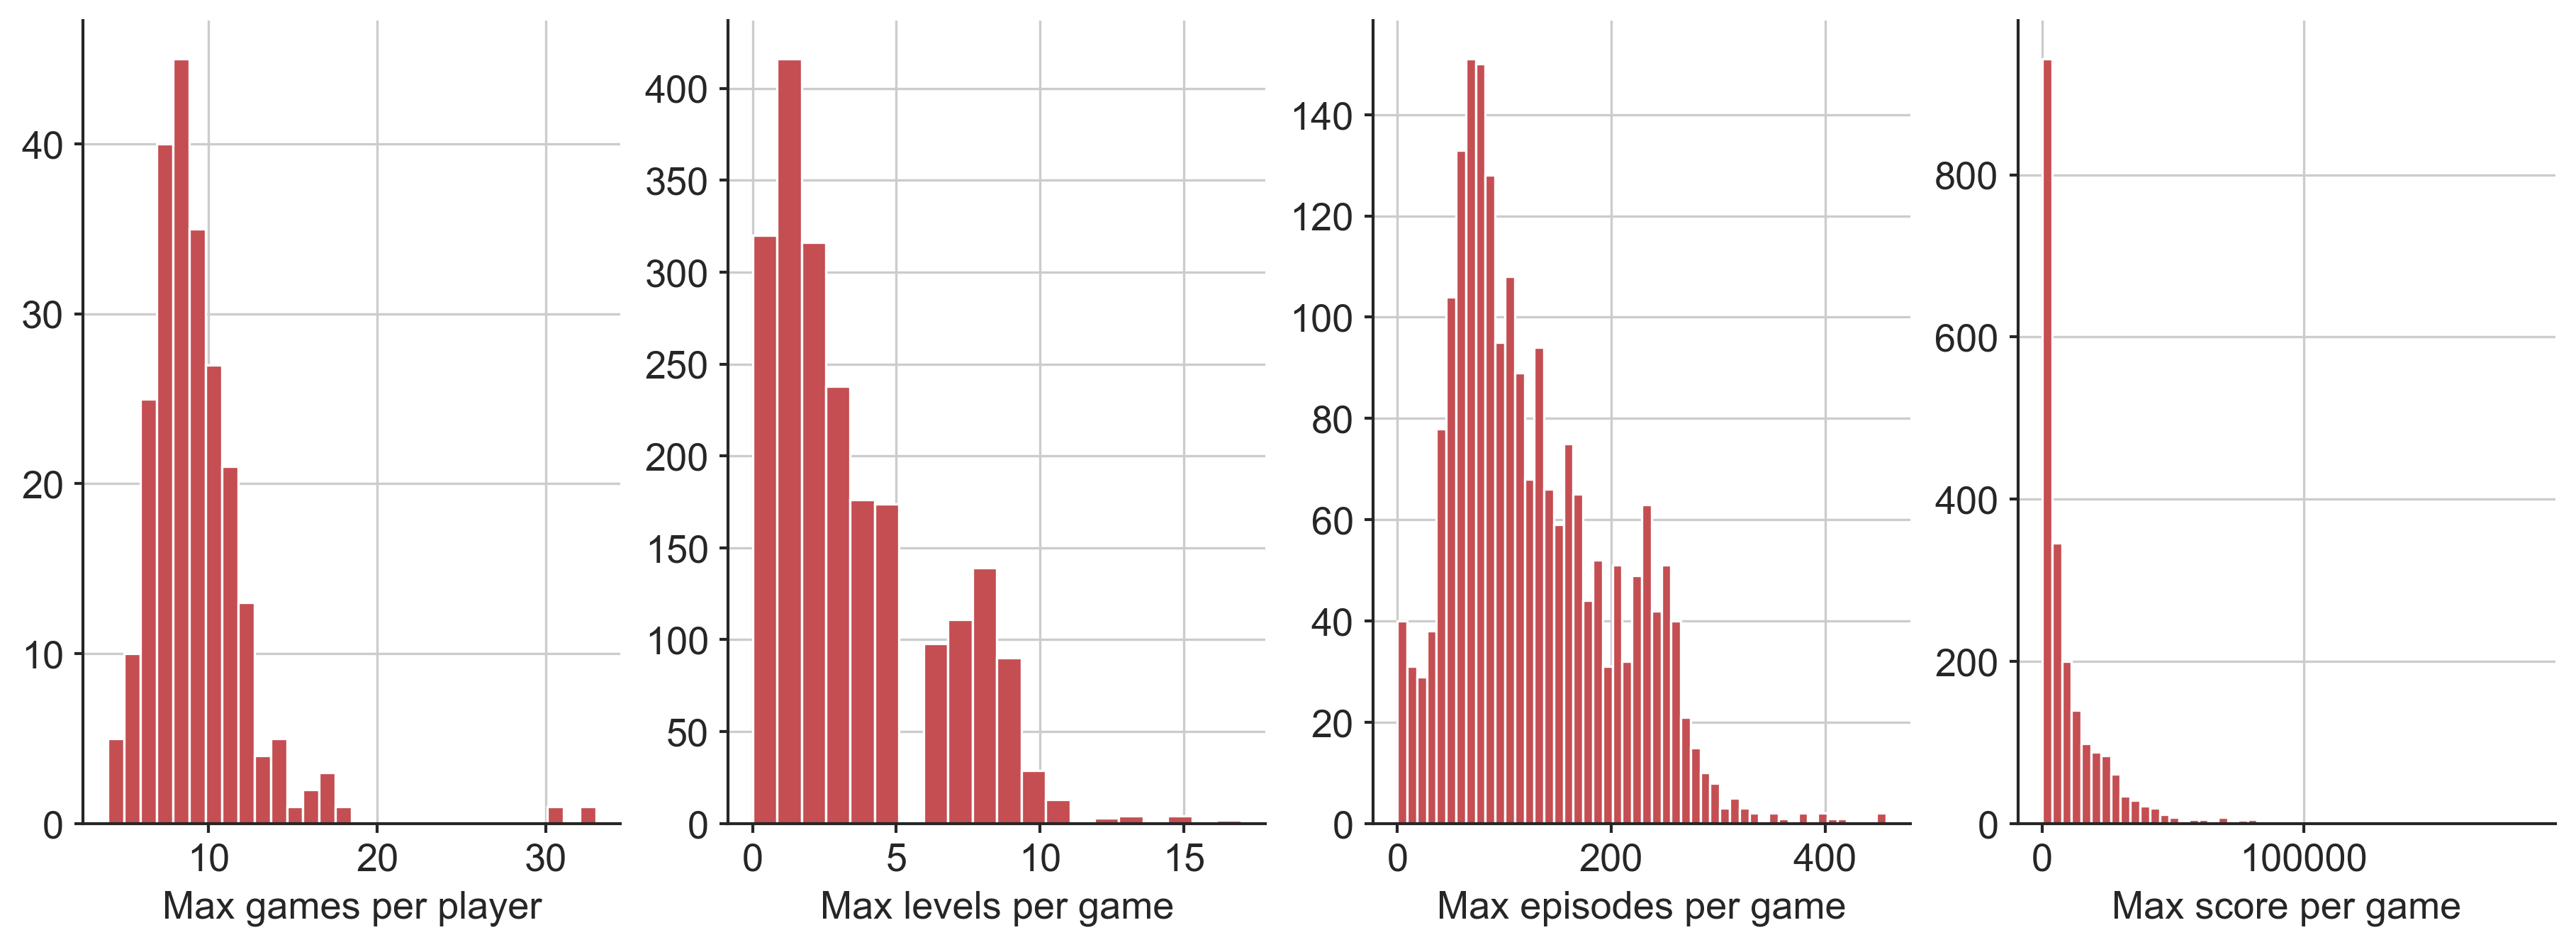

In [5]:
# max games per player
games = df.groupby('SID')['game_number'].max()
# max levels per game
levels = df.groupby(['SID', 'game_number'])['level'].max()
# max episodes per game
episodes = df.groupby(['SID', 'game_number'])['episode_number'].max()
# max score per player
scores = df.groupby(['SID', 'game_number'])['score'].max()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))

ax1.set_xlabel('Max games per player')
ax1.hist(games, bins=30)

ax2.set_xlabel('Max levels per game')
ax2.hist(levels, bins=20)

ax3.set_xlabel('Max episodes per game')
ax3.hist(episodes, bins=50)

ax4.set_xlabel('Max score per game')
ax4.hist(scores, bins=50)

plt.show()

Is score correlated with number of games played?

In [6]:
df[df['game_number'] == 1].groupby(['SID', 'game_number'])['score'].max().describe()

count      239.0000
mean     13414.3682
std      18465.9345
min        128.0000
25%       1879.0000
50%       7156.0000
75%      20307.5000
max     187075.0000
Name: score, dtype: float64

In [7]:
no_outliers = df[~(df['SID'] == '105')     # had a score of >180000 on game 1
                 & ~(df['SID'] == '3176')  # played 31 games
                 & ~(df['SID'] == '3191')] # played 33 games

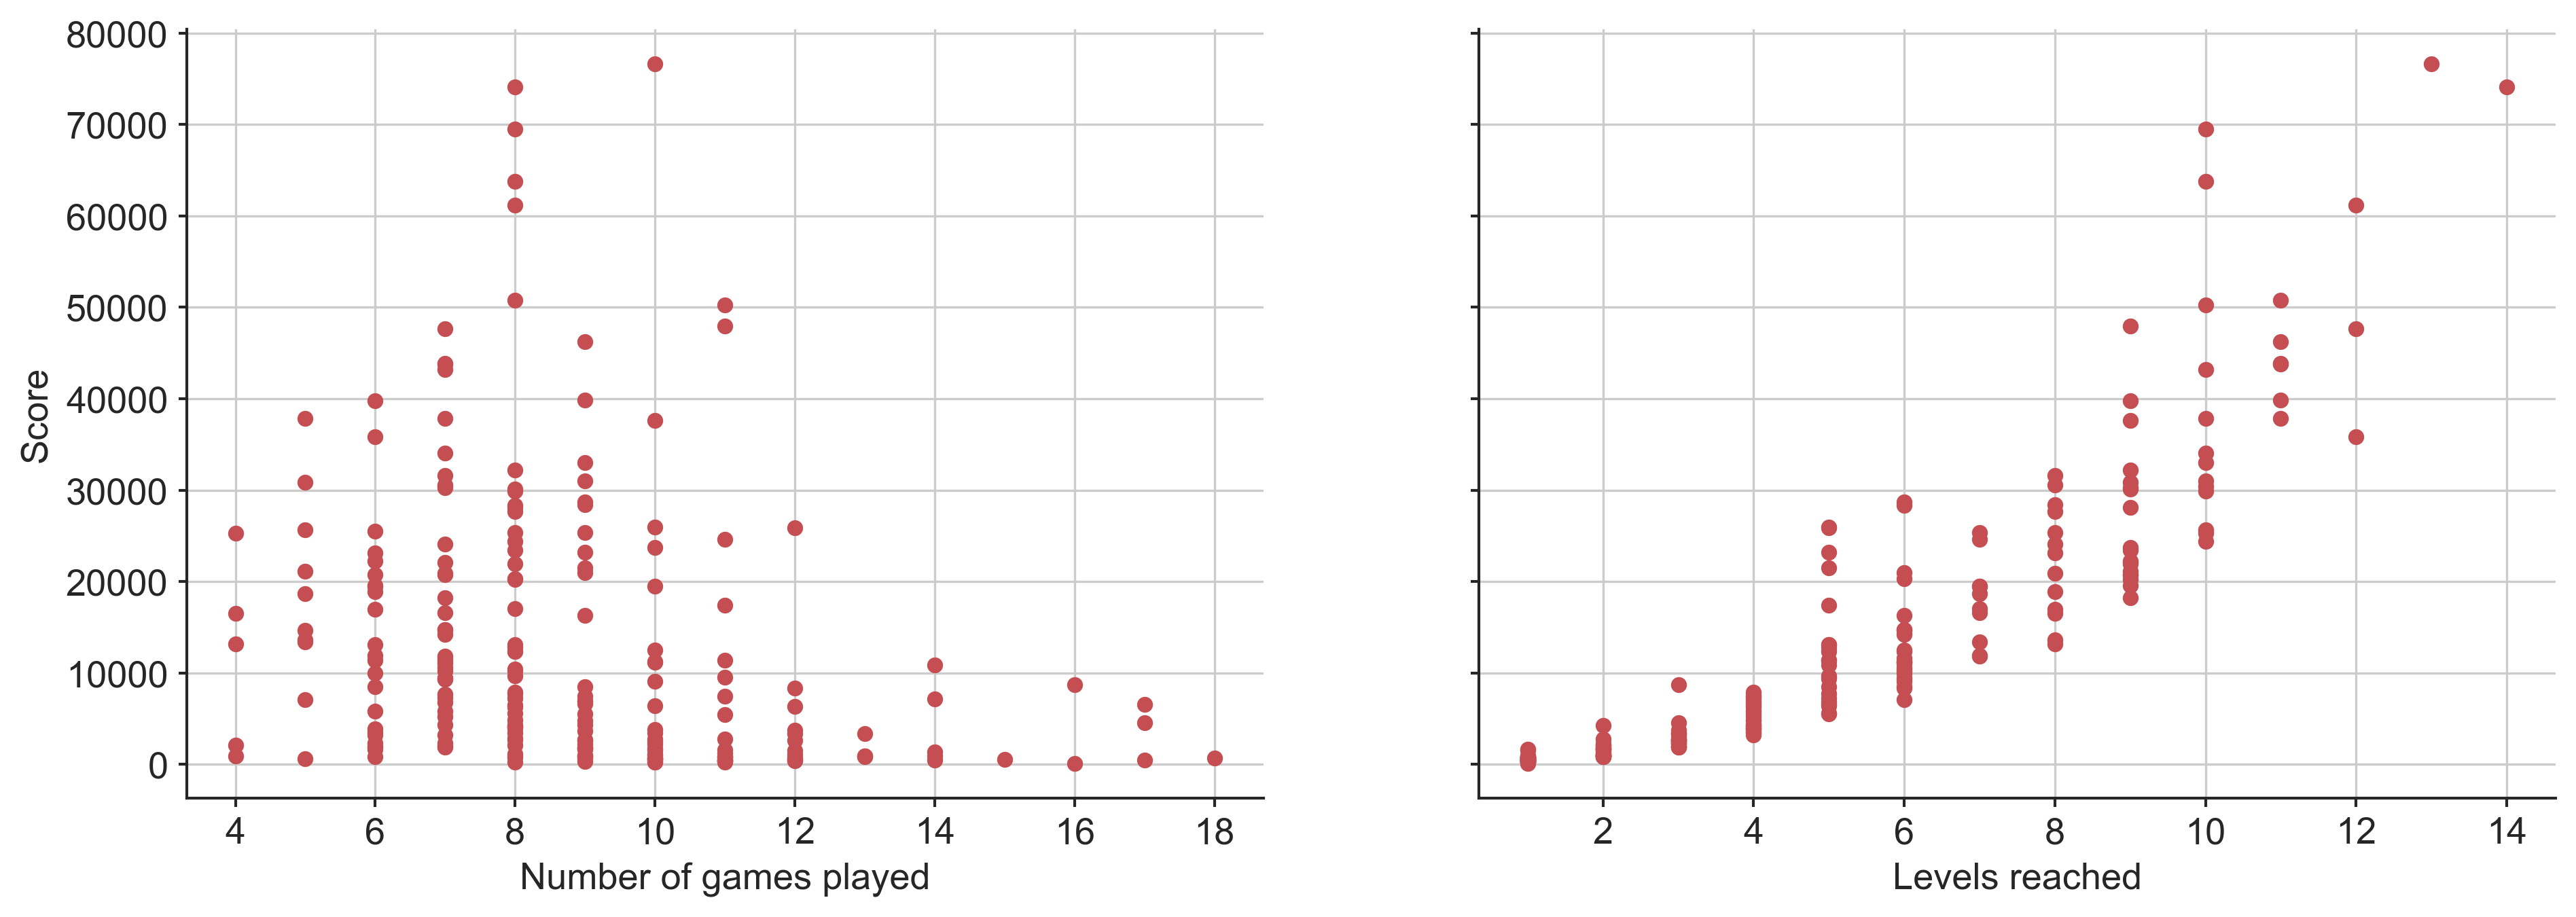

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey='row')

score = no_outliers[no_outliers['game_number'] == 1].groupby('SID')['score'].max()
games = no_outliers.groupby('SID')['game_number'].nunique()
ax1.scatter(games, score)
ax1.set_xlabel('Number of games played')
ax1.set_ylabel('Score')

levels = no_outliers[no_outliers['game_number'] == 1].groupby('SID')['level'].nunique()
ax2.scatter(levels, score)
ax2.set_xlabel('Levels reached')
plt.show()

Correlate number of games played with score at game 1

In [9]:
pg.corr(games, score)

n       r           CI95%  p-val     BF10  power
pearson  236 -0.2666  [-0.38, -0.14] 0.0000  423.654 0.9868

Correlate level reached at game 1 with score at game 1

In [10]:
pg.corr(levels, score)

n      r         CI95%  p-val       BF10  power
pearson  236 0.8885  [0.86, 0.91] 0.0000  2.559e+77 1.0000

Correlation between score and number of games played

### Visualise trajectory of components over successive episodes

We first create a dataframe of games that all have some minimum number of episodes

In [11]:
# select games that have some minimum number of episodes
min_eps = 50

df_ = df

# identify games with less than min_eps episodes
eps_count = df_.groupby(['SID', 'game_number'], sort=False)['episode_number'].max()
condition = eps_count[eps_count < min_eps]

# drop those games using multiindex
for i, multiindex in enumerate(condition.index):
    
    dropped_rows = df_[(df_['SID'] == multiindex[0]) & (df_['game_number'] == multiindex[1])]
    df_.drop(dropped_rows.index, inplace=True)

We drop all games that initialise at episode number 1 as opposed to the default 0

In [12]:
# identify games with less than min_eps episodes
first_ep = df_.groupby(['SID', 'game_number'], sort=False)['episode_number'].min()
condition = first_ep[first_ep != 0]

# drop those games using multiindex
for i, multiindex in enumerate(condition.index):
    
    dropped_rows = df_[(df_['SID'] == multiindex[0]) & (df_['game_number'] == multiindex[1])]
    df_.drop(dropped_rows.index, inplace=True)

Define a target number of games and select only game numbers of target and below

In [13]:
target_games = 5
df_ = df_[df_['game_number'] <= target_games]

Drop players with less than target number of target games

In [14]:
# identify how many games were played by each player
game_count = df_.groupby('SID', sort=False)['game_number'].nunique()
# drop players who played less games than our target
condition = game_count[game_count >= target_games]
players = condition.index.tolist()

df_ = df_[df_['SID'].isin(players)]

Restrict data set to 'min_eps' episodes per game

In [15]:
df_ = df_.groupby(['SID', 'game_number']).head(min_eps)

Split data by game

In [47]:
game_1 = df_[df_['game_number'] == 1]
game_2 = df_[df_['game_number'] == 2]
game_3 = df_[df_['game_number'] == 3]
game_4 = df_[df_['game_number'] == 4]
game_5 = df_[df_['game_number'] == 5]

Calculate trajectories of each component over first n episodes for each game

In [17]:
comp_names = ['disarray', 'well_prep', 'action_inefficiency', 'dec_act_latency']

Plot

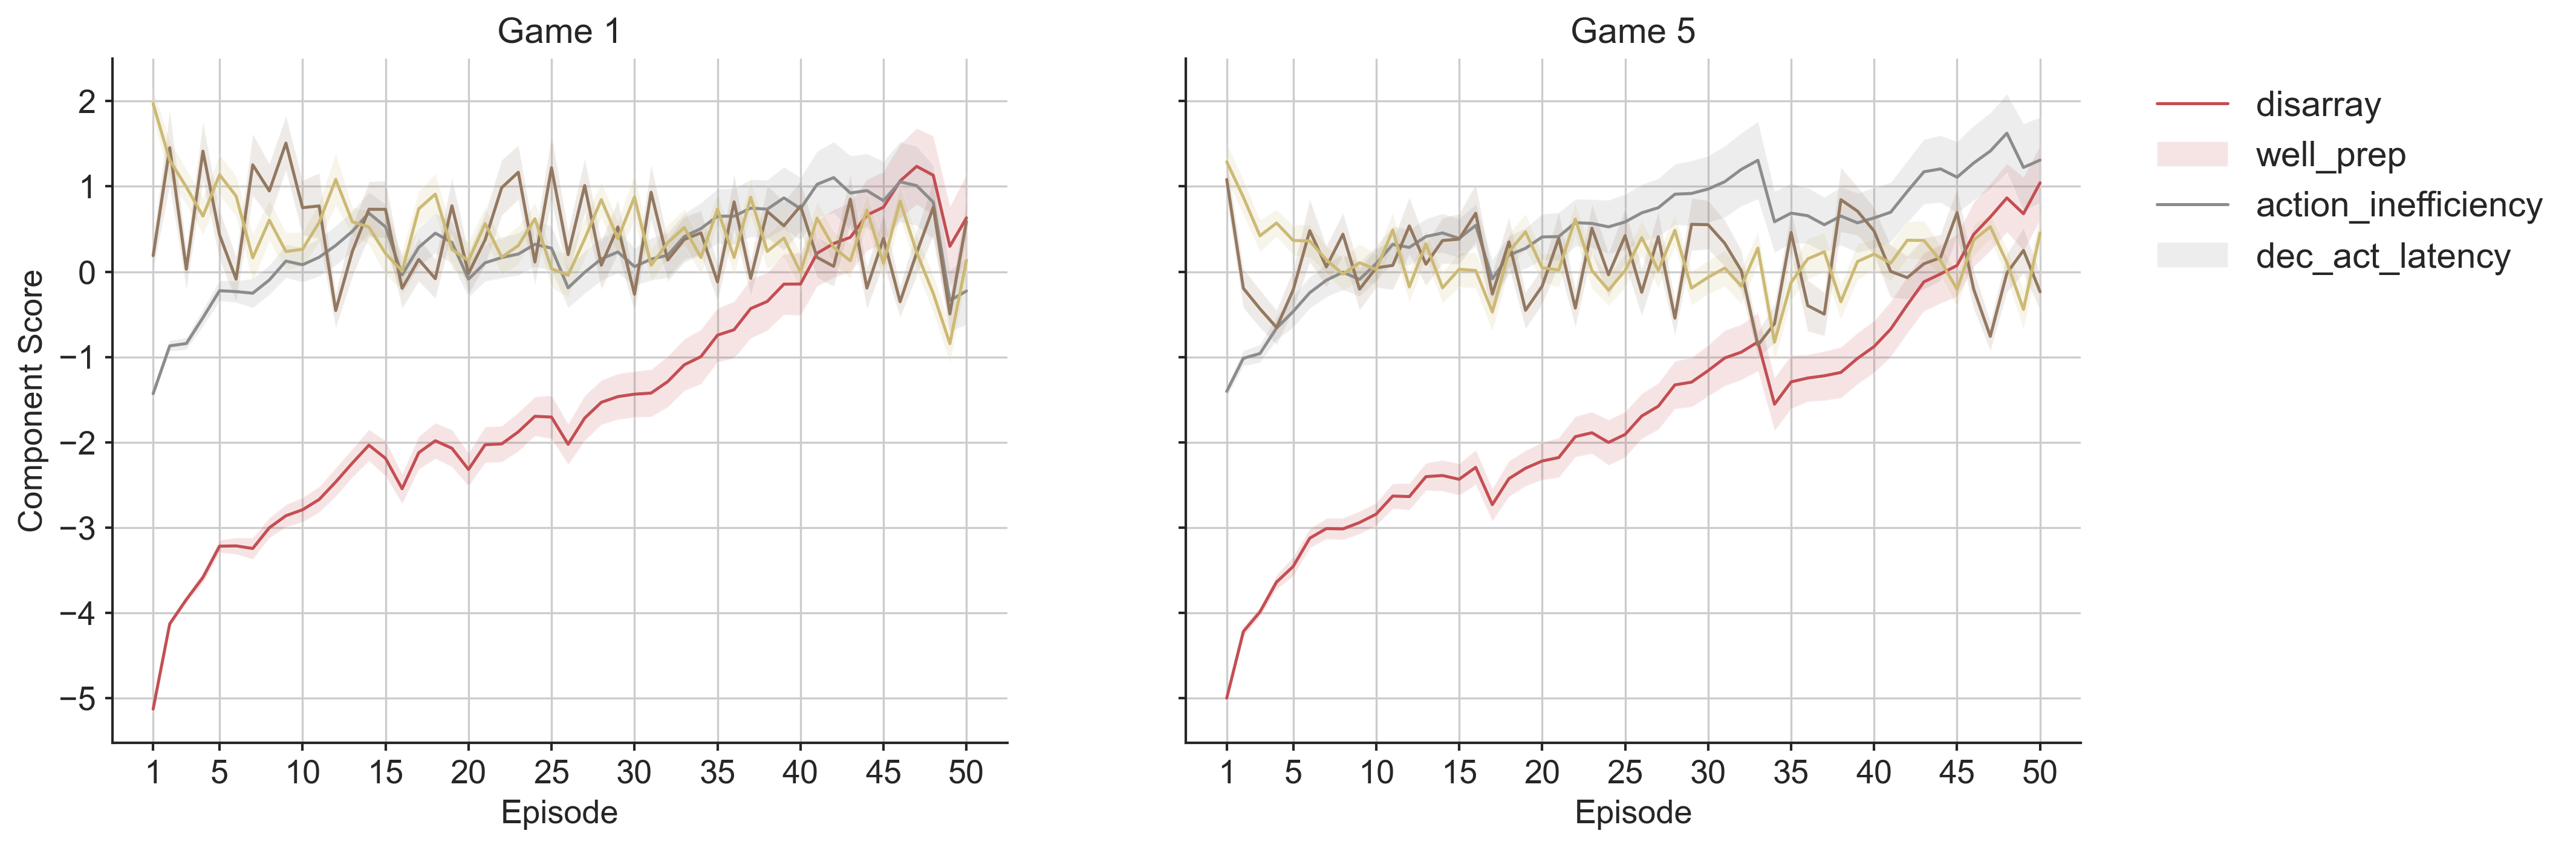

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey='row')

error_line(game_1, 'disarray', min_eps, ax1)
error_line(game_1, 'well_prep', min_eps, ax1)
error_line(game_1, 'action_inefficiency', min_eps, ax1)
error_line(game_1, 'dec_act_latency', min_eps, ax1)
ax1.set_title('Game 1')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Component Score')

error_line(game_5, 'disarray', min_eps, ax2)
error_line(game_5, 'well_prep', min_eps, ax2)
error_line(game_5, 'action_inefficiency', min_eps, ax2)
error_line(game_5, 'dec_act_latency', min_eps, ax2)
ax2.set_title('Game 5')
ax2.set_xlabel('Episode')

plt.legend(labels=comp_names, bbox_to_anchor=(1.05, 1))
plt.show()

## Compare expert players to novices

First split players into to top 10 and bottom 10 percent in score on first game

In [19]:
first_game_score = df_[df_['game_number'] == 1].groupby('SID', sort=False)['score'].max().sort_values()
bottom = first_game_score[first_game_score <= first_game_score.quantile(.1)].index.tolist()
top = first_game_score[first_game_score >= first_game_score.quantile(.9)].index.tolist()

bottom = df_[df_['SID'].isin(bottom)]
top = df_[df_['SID'].isin(top)]

# game 1
bottom_1 = bottom[bottom['game_number'] == 1]
top_1 = top[top['game_number'] == 1]

# game 3
bottom_3 = bottom[bottom['game_number'] == 3]
top_3 = top[top['game_number'] == 3]

Plot average trajectories of each component over first 50 episodes

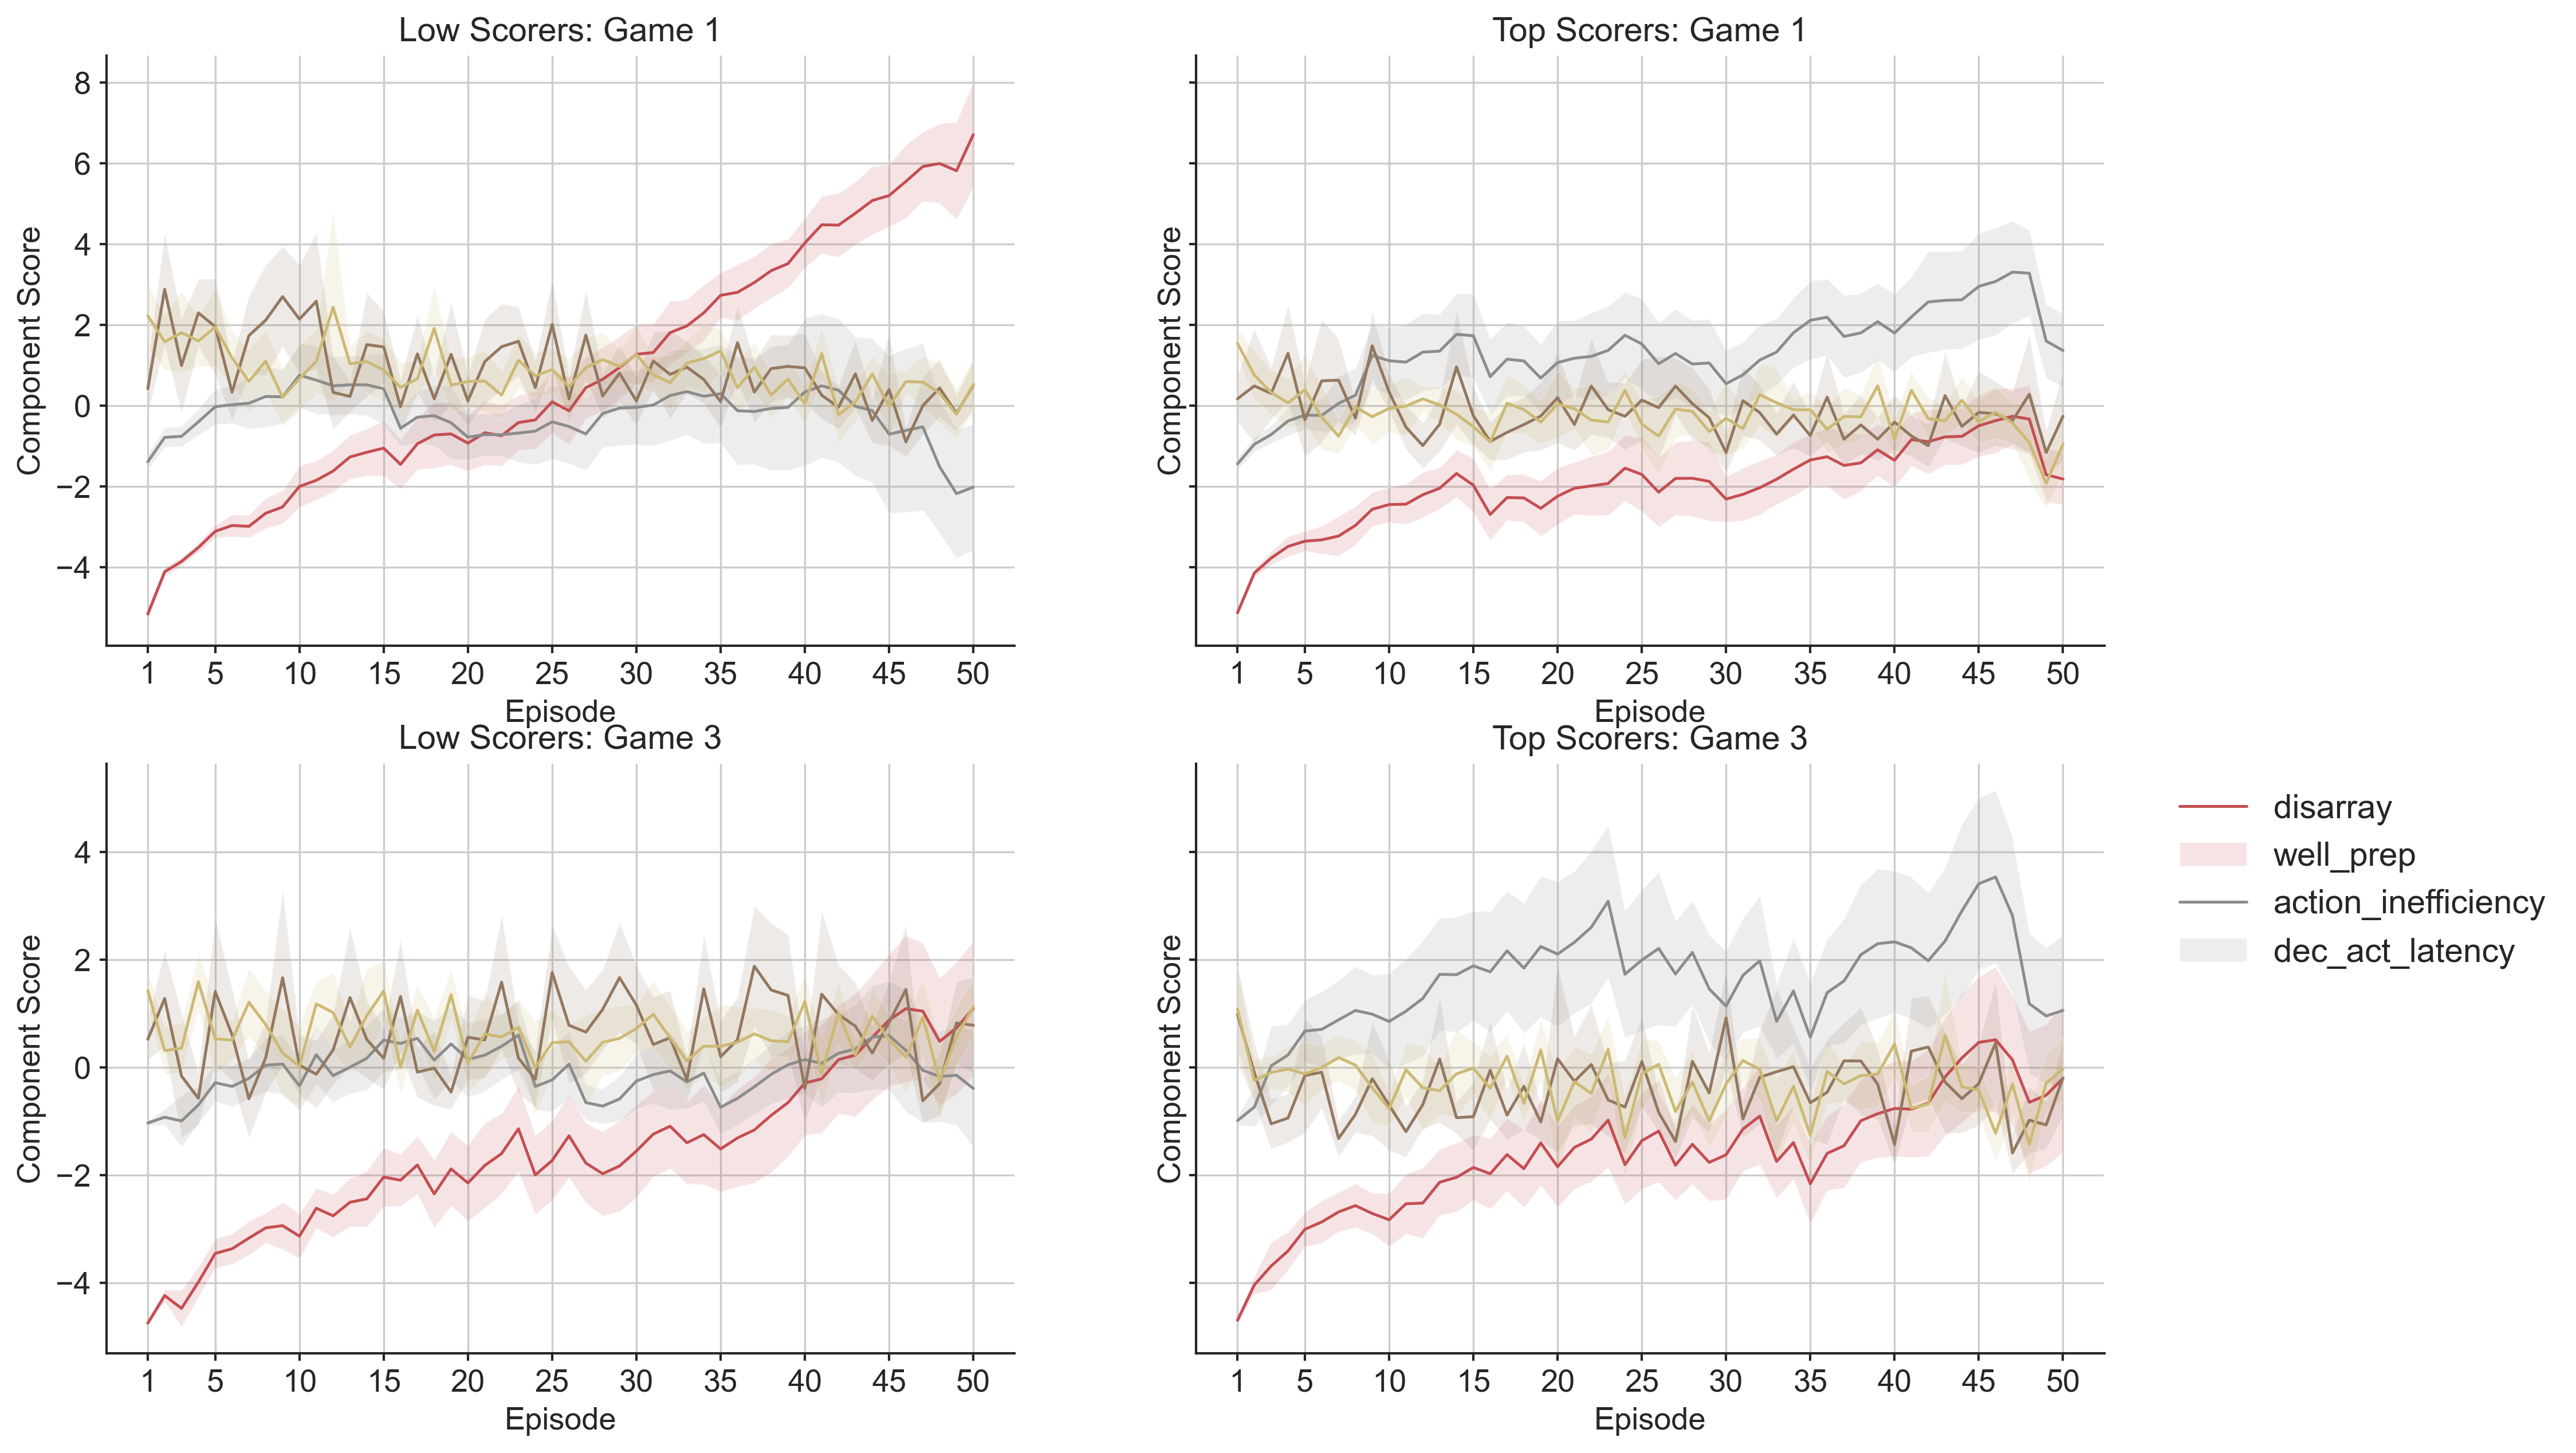

In [20]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10), sharey='row')

error_line(bottom_1, 'disarray', min_eps, ax1)
error_line(bottom_1, 'well_prep', min_eps, ax1)
error_line(bottom_1, 'action_inefficiency', min_eps, ax1)
error_line(bottom_1, 'dec_act_latency', min_eps, ax1)
ax1.set_title('Low Scorers: Game 1')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Component Score')

error_line(top_1, 'disarray', min_eps, ax2)
error_line(top_1, 'well_prep', min_eps, ax2)
error_line(top_1, 'action_inefficiency', min_eps, ax2)
error_line(top_1, 'dec_act_latency', min_eps, ax2)
ax2.set_title('Top Scorers: Game 1')
ax2.set_xlabel('Episode')
ax2.set_ylabel('Component Score')

error_line(bottom_3, 'disarray', min_eps, ax3)
error_line(bottom_3, 'well_prep', min_eps, ax3)
error_line(bottom_3, 'action_inefficiency', min_eps, ax3)
error_line(bottom_3, 'dec_act_latency', min_eps, ax3)
ax3.set_title('Low Scorers: Game 3')
ax3.set_xlabel('Episode')
ax3.set_ylabel('Component Score')

error_line(top_3, 'disarray', min_eps, ax4)
error_line(top_3, 'well_prep', min_eps, ax4)
error_line(top_3, 'action_inefficiency', min_eps, ax4)
error_line(top_3, 'dec_act_latency', min_eps, ax4)
ax4.set_title('Top Scorers: Game 3')
ax4.set_xlabel('Episode')
ax4.set_ylabel('Component Score')

plt.legend(labels=comp_names, bbox_to_anchor=(1.05, 1))
plt.show()

## Do experts and novices differ in component scores?

Setup data structure for box/violin plots

In [21]:
bottom.insert(10, 'skill', len(bottom)*['Low Scorer'])
top.insert(10, 'skill', len(top) * ['Top Scorer'])

In [22]:
# Specify zoid number to compare
nth_zoid = 50

box_df = pd.concat([bottom, top])
box_df.reset_index(drop=True)
box_df_1 = box_df[box_df['game_number'] == 1]
box_df_nth_ep = box_df_1[box_df_1['episode_number'] == nth_zoid-1]

Visualise differences

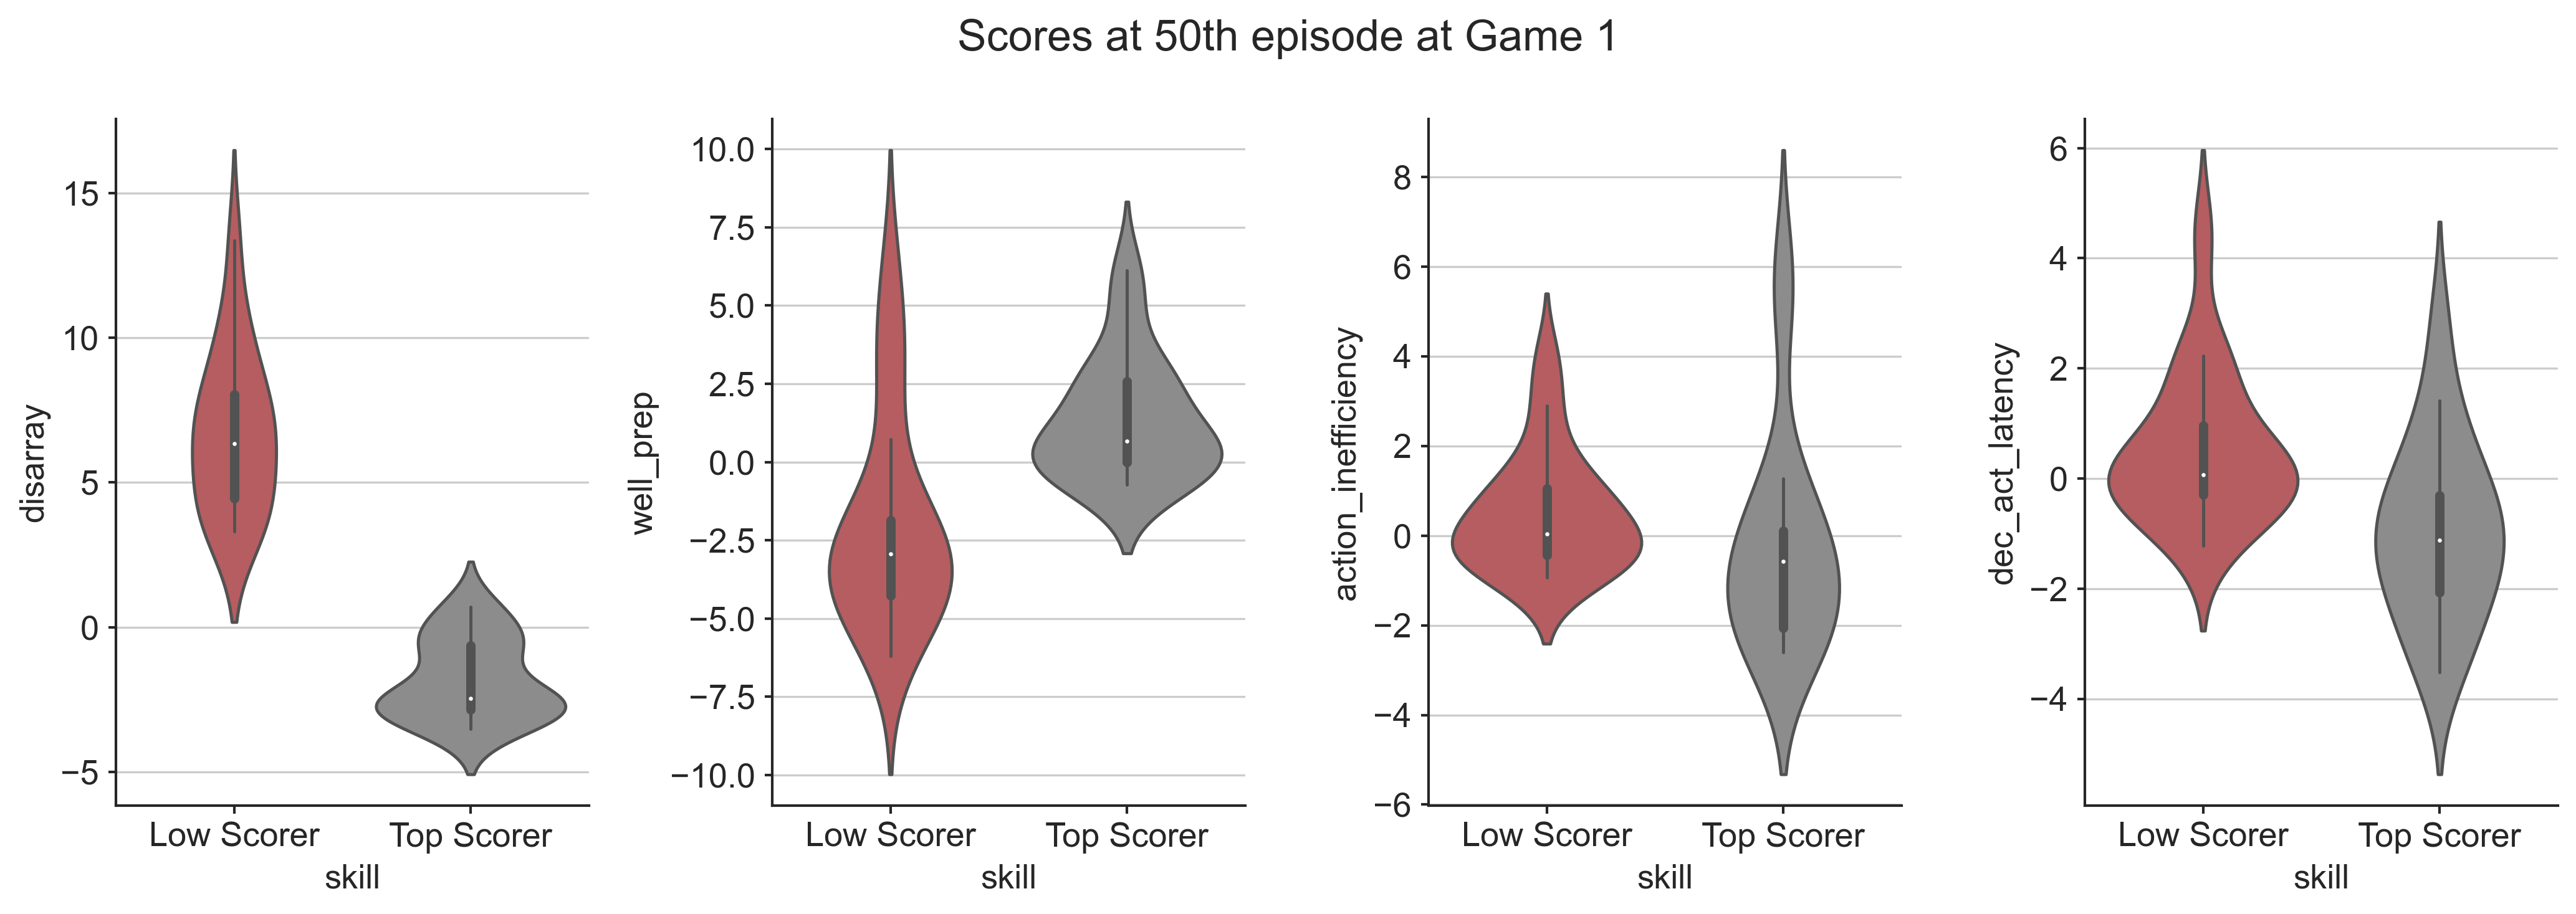

In [23]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 5))
sns.violinplot(x='skill', y='disarray', data=box_df_nth_ep, ax=ax1)
sns.violinplot(x='skill', y='well_prep', data=box_df_nth_ep, ax=ax2)
sns.violinplot(x='skill', y='action_inefficiency', data=box_df_nth_ep, ax=ax3)
sns.violinplot(x='skill', y='dec_act_latency', data=box_df_nth_ep, ax=ax4)

fig.suptitle(f'Scores at {nth_zoid}th episode at Game 1')

fig.tight_layout()
plt.show()

## Do mean scores differ across episodes?

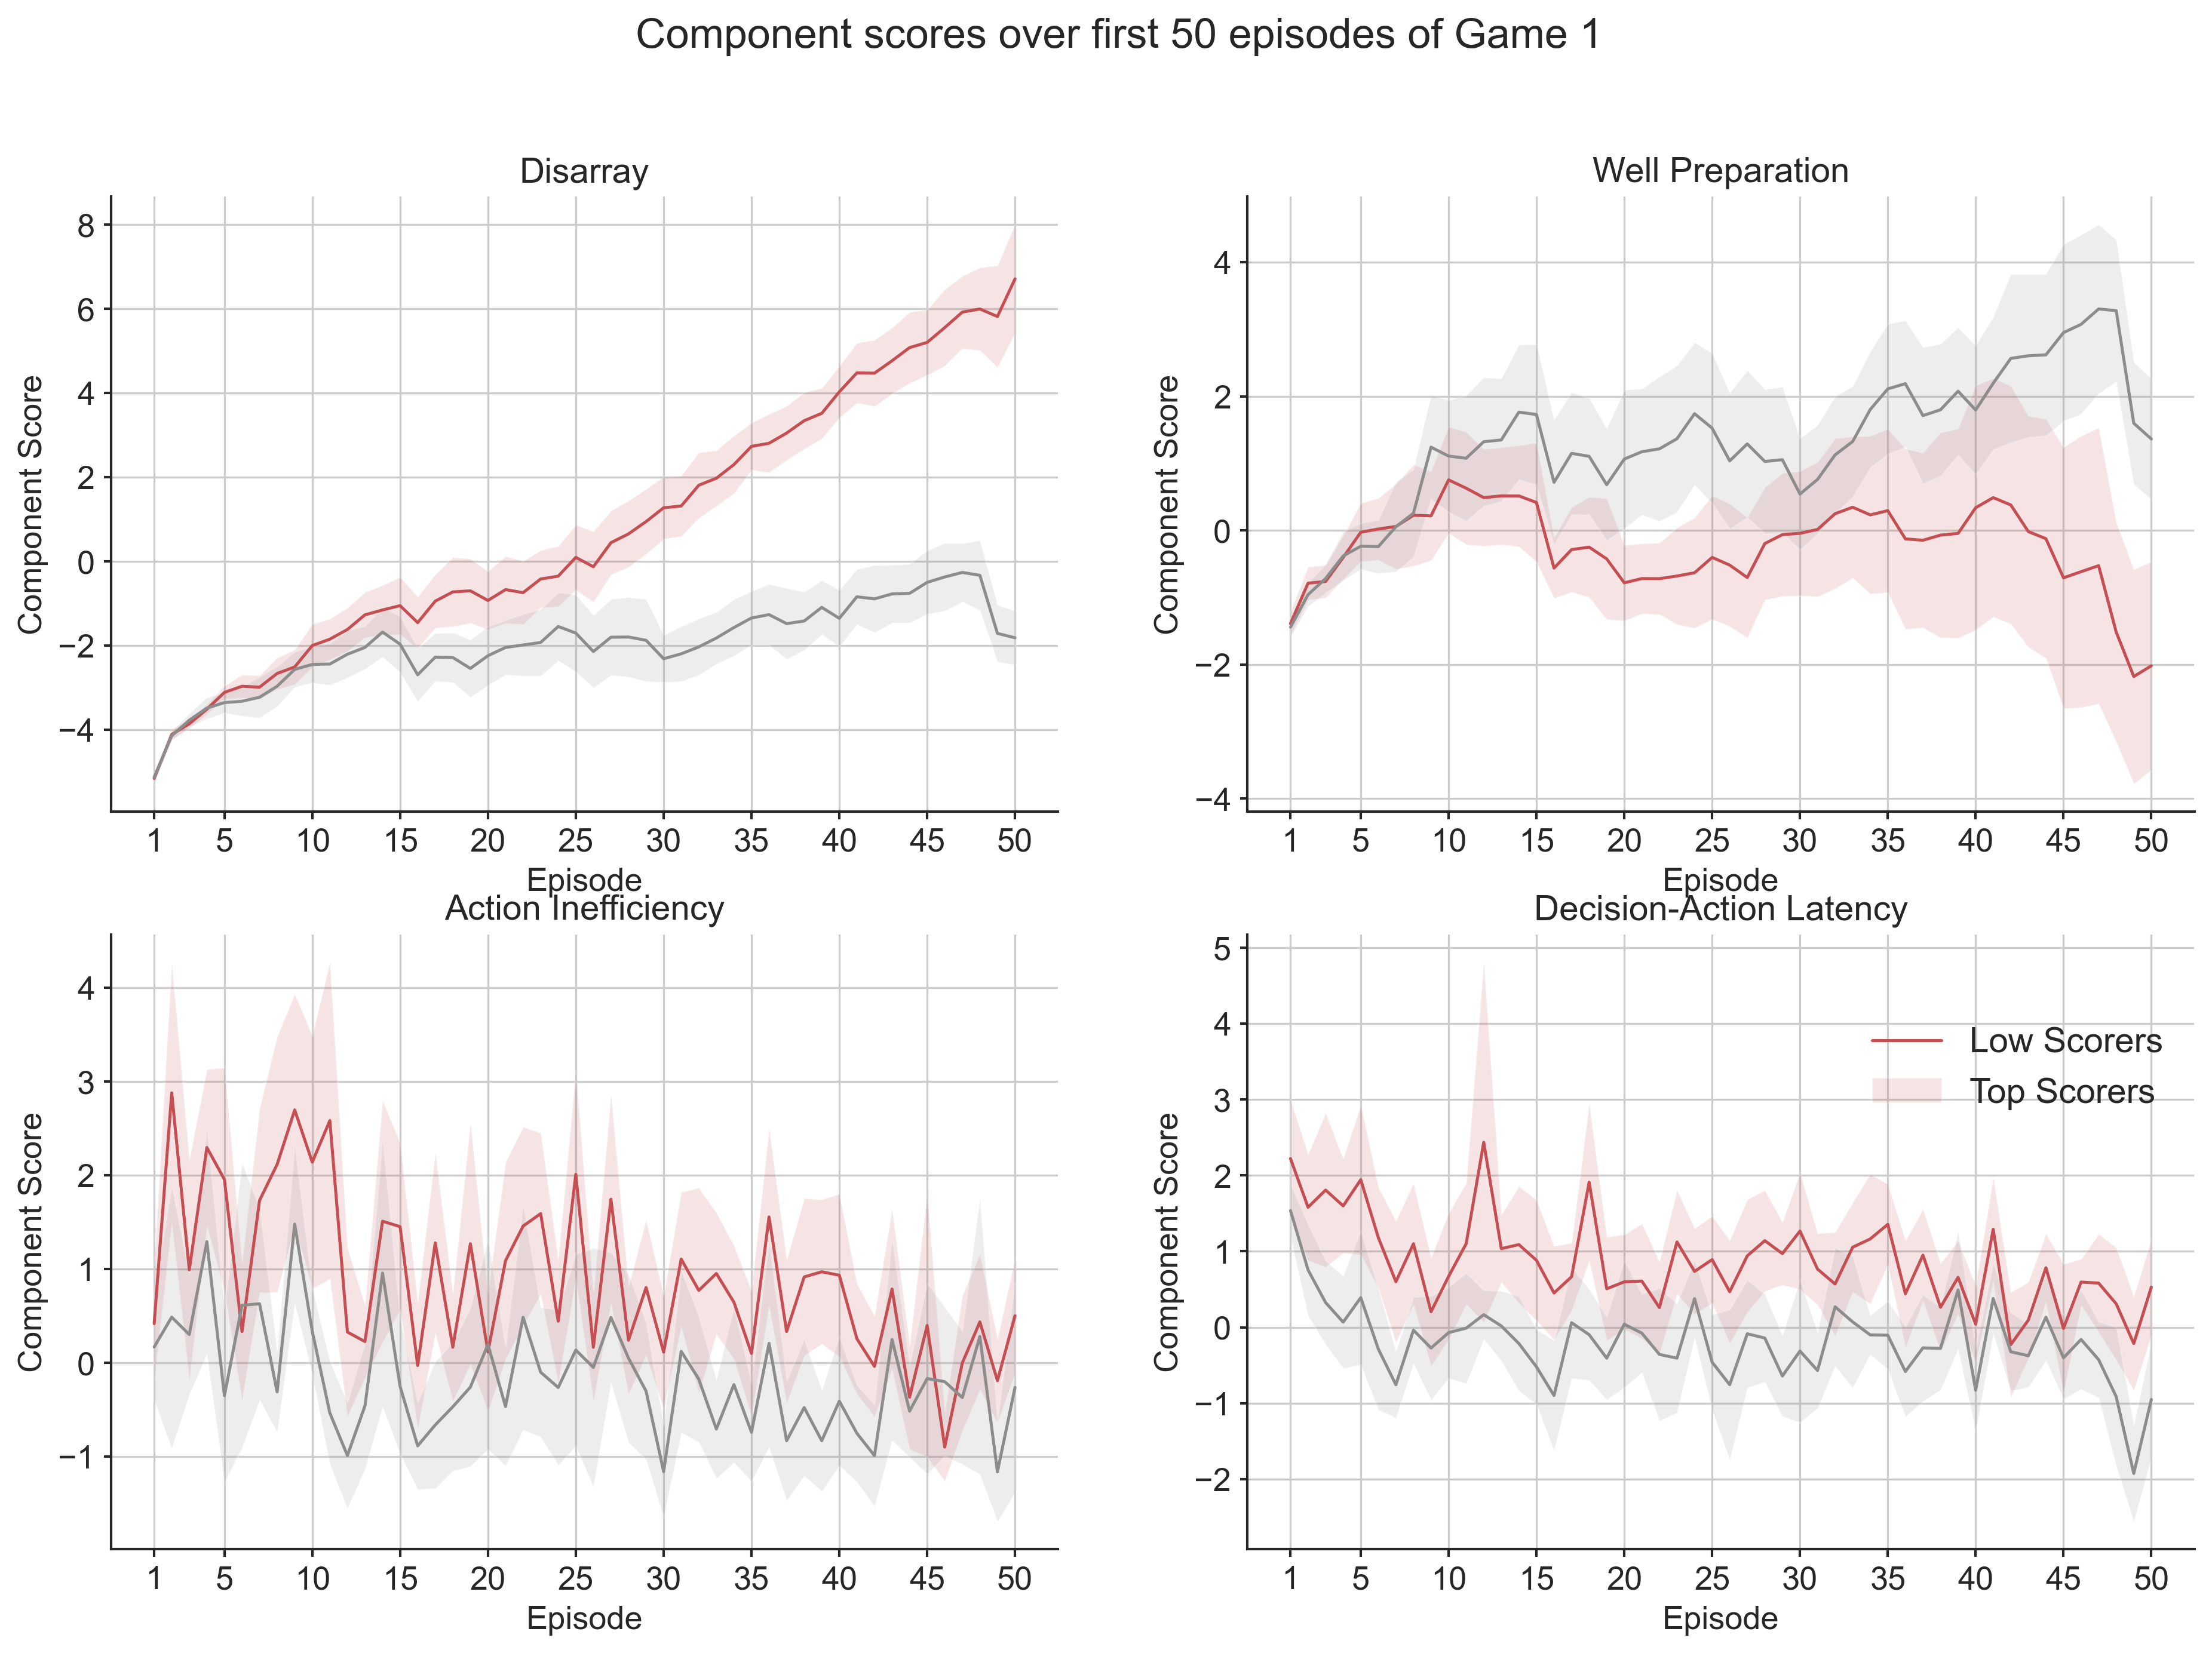

In [24]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

error_line(bottom_1, 'disarray', min_eps, ax1)
error_line(top_1, 'disarray', min_eps, ax1)
ax1.set_title('Disarray')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Component Score')

error_line(bottom_1, 'well_prep', min_eps, ax2)
error_line(top_1, 'well_prep', min_eps, ax2)
ax2.set_title('Well Preparation')
ax2.set_xlabel('Episode')
ax2.set_ylabel('Component Score')

error_line(bottom_1, 'action_inefficiency', min_eps, ax3)
error_line(top_1, 'action_inefficiency', min_eps, ax3)
ax3.set_title('Action Inefficiency')
ax3.set_xlabel('Episode')
ax3.set_ylabel('Component Score')

error_line(bottom_1, 'dec_act_latency', min_eps, ax4)
error_line(top_1, 'dec_act_latency', min_eps, ax4)
ax4.set_title('Decision-Action Latency')
ax4.set_xlabel('Episode')
ax4.set_ylabel('Component Score')

fig.suptitle('Component scores over first 50 episodes of Game 1')
plt.legend(labels=['Low Scorers', 'Top Scorers'], bbox_to_anchor=(1, 0.9))
plt.savefig('plot.png')
plt.show()

## Mixed ANOVA for each performance component with episode as within- and skill as between-subjects factor

Disarray

In [25]:
pg.mixed_anova(data=box_df_1, dv='disarray', within='episode_number', between='skill', subject='SID')

Source        SS  DF1   DF2        MS        F  p-unc  p-GG-corr  \
0           skill 3382.1086    1    34 3382.1086  81.9263 0.0000        NaN   
1  episode_number 7149.1455   49  1666  145.9009 110.8136 0.0000     0.0000   
2     Interaction 2373.3884   49  1666   48.4365  36.7881 0.0000        NaN   

     np2    eps sphericity  W-spher  p-spher  
0 0.7067    NaN        NaN      NaN      NaN  
1 0.7652 0.0430      False   0.0000   0.0000  
2 0.5197    NaN        NaN      NaN      NaN

Well preparation

In [26]:
pg.mixed_anova(data=box_df_1, dv='well_prep', within='episode_number', between='skill', subject='SID')

Source        SS  DF1   DF2        MS       F  p-unc    np2    eps
0           skill 1070.2218    1    34 1070.2218 10.8951 0.0023 0.2427    NaN
1  episode_number  688.7884   49  1666   14.0569  4.3809 0.0000 0.1141 0.0742
2     Interaction  604.0024   49  1666   12.3266  3.8416 0.0000 0.1015    NaN

Action inefficiency

In [27]:
pg.mixed_anova(data=box_df_1, dv='action_inefficiency', within='episode_number', between='skill', subject='SID')

Source       SS  DF1   DF2       MS       F  p-unc    np2    eps
0           skill 508.5339    1    34 508.5339 26.3796 0.0000 0.4369    NaN
1  episode_number 715.3724   49  1666  14.5994  4.3308 0.0000 0.1130 0.3375
2     Interaction 235.1663   49  1666   4.7993  1.4237 0.0296 0.0402    NaN

Decision-action latency

In [28]:
pg.mixed_anova(data=box_df_1, dv='dec_act_latency', within='episode_number', between='skill', subject='SID')

Source       SS  DF1   DF2       MS       F  p-unc    np2    eps
0           skill 504.1565    1    34 504.1565 21.7530 0.0000 0.3902    NaN
1  episode_number 440.5794   49  1666   8.9914  4.8129 0.0000 0.1240 0.2787
2     Interaction  99.6776   49  1666   2.0342  1.0889 0.3138 0.0310    NaN

## Define top versus low scorers using average score across games rather than first score

## Can we predict final score from component scores in first game?

Set up data structure for regression

In [29]:
# dependent variable
final_score = df.groupby('SID')['score'].last()
# nth episode
nth_ep = 25

game_1 = df[df['game_number'] == 1]
game_1 = game_1.groupby('SID')

# set up dataframe
pred_df = pd.DataFrame({'final_score': df.groupby('SID')['score'].last(), 
                        'disarray_g1': game_1['disarray'].mean(), 
                        'well_prep_g1': game_1['well_prep'].mean(), 
                        'act_inef_g1': game_1['action_inefficiency'].mean(), 
                        'dal_g1': game_1['dec_act_latency'].mean(), 
                        'first_score': game_1['score'].last()})

# peculiar, but not all players start at game 1, resulting in mismatched column lengths... remove the culprits here
pred_df.dropna(inplace=True)
pred_df.reset_index(drop=True, inplace=True)

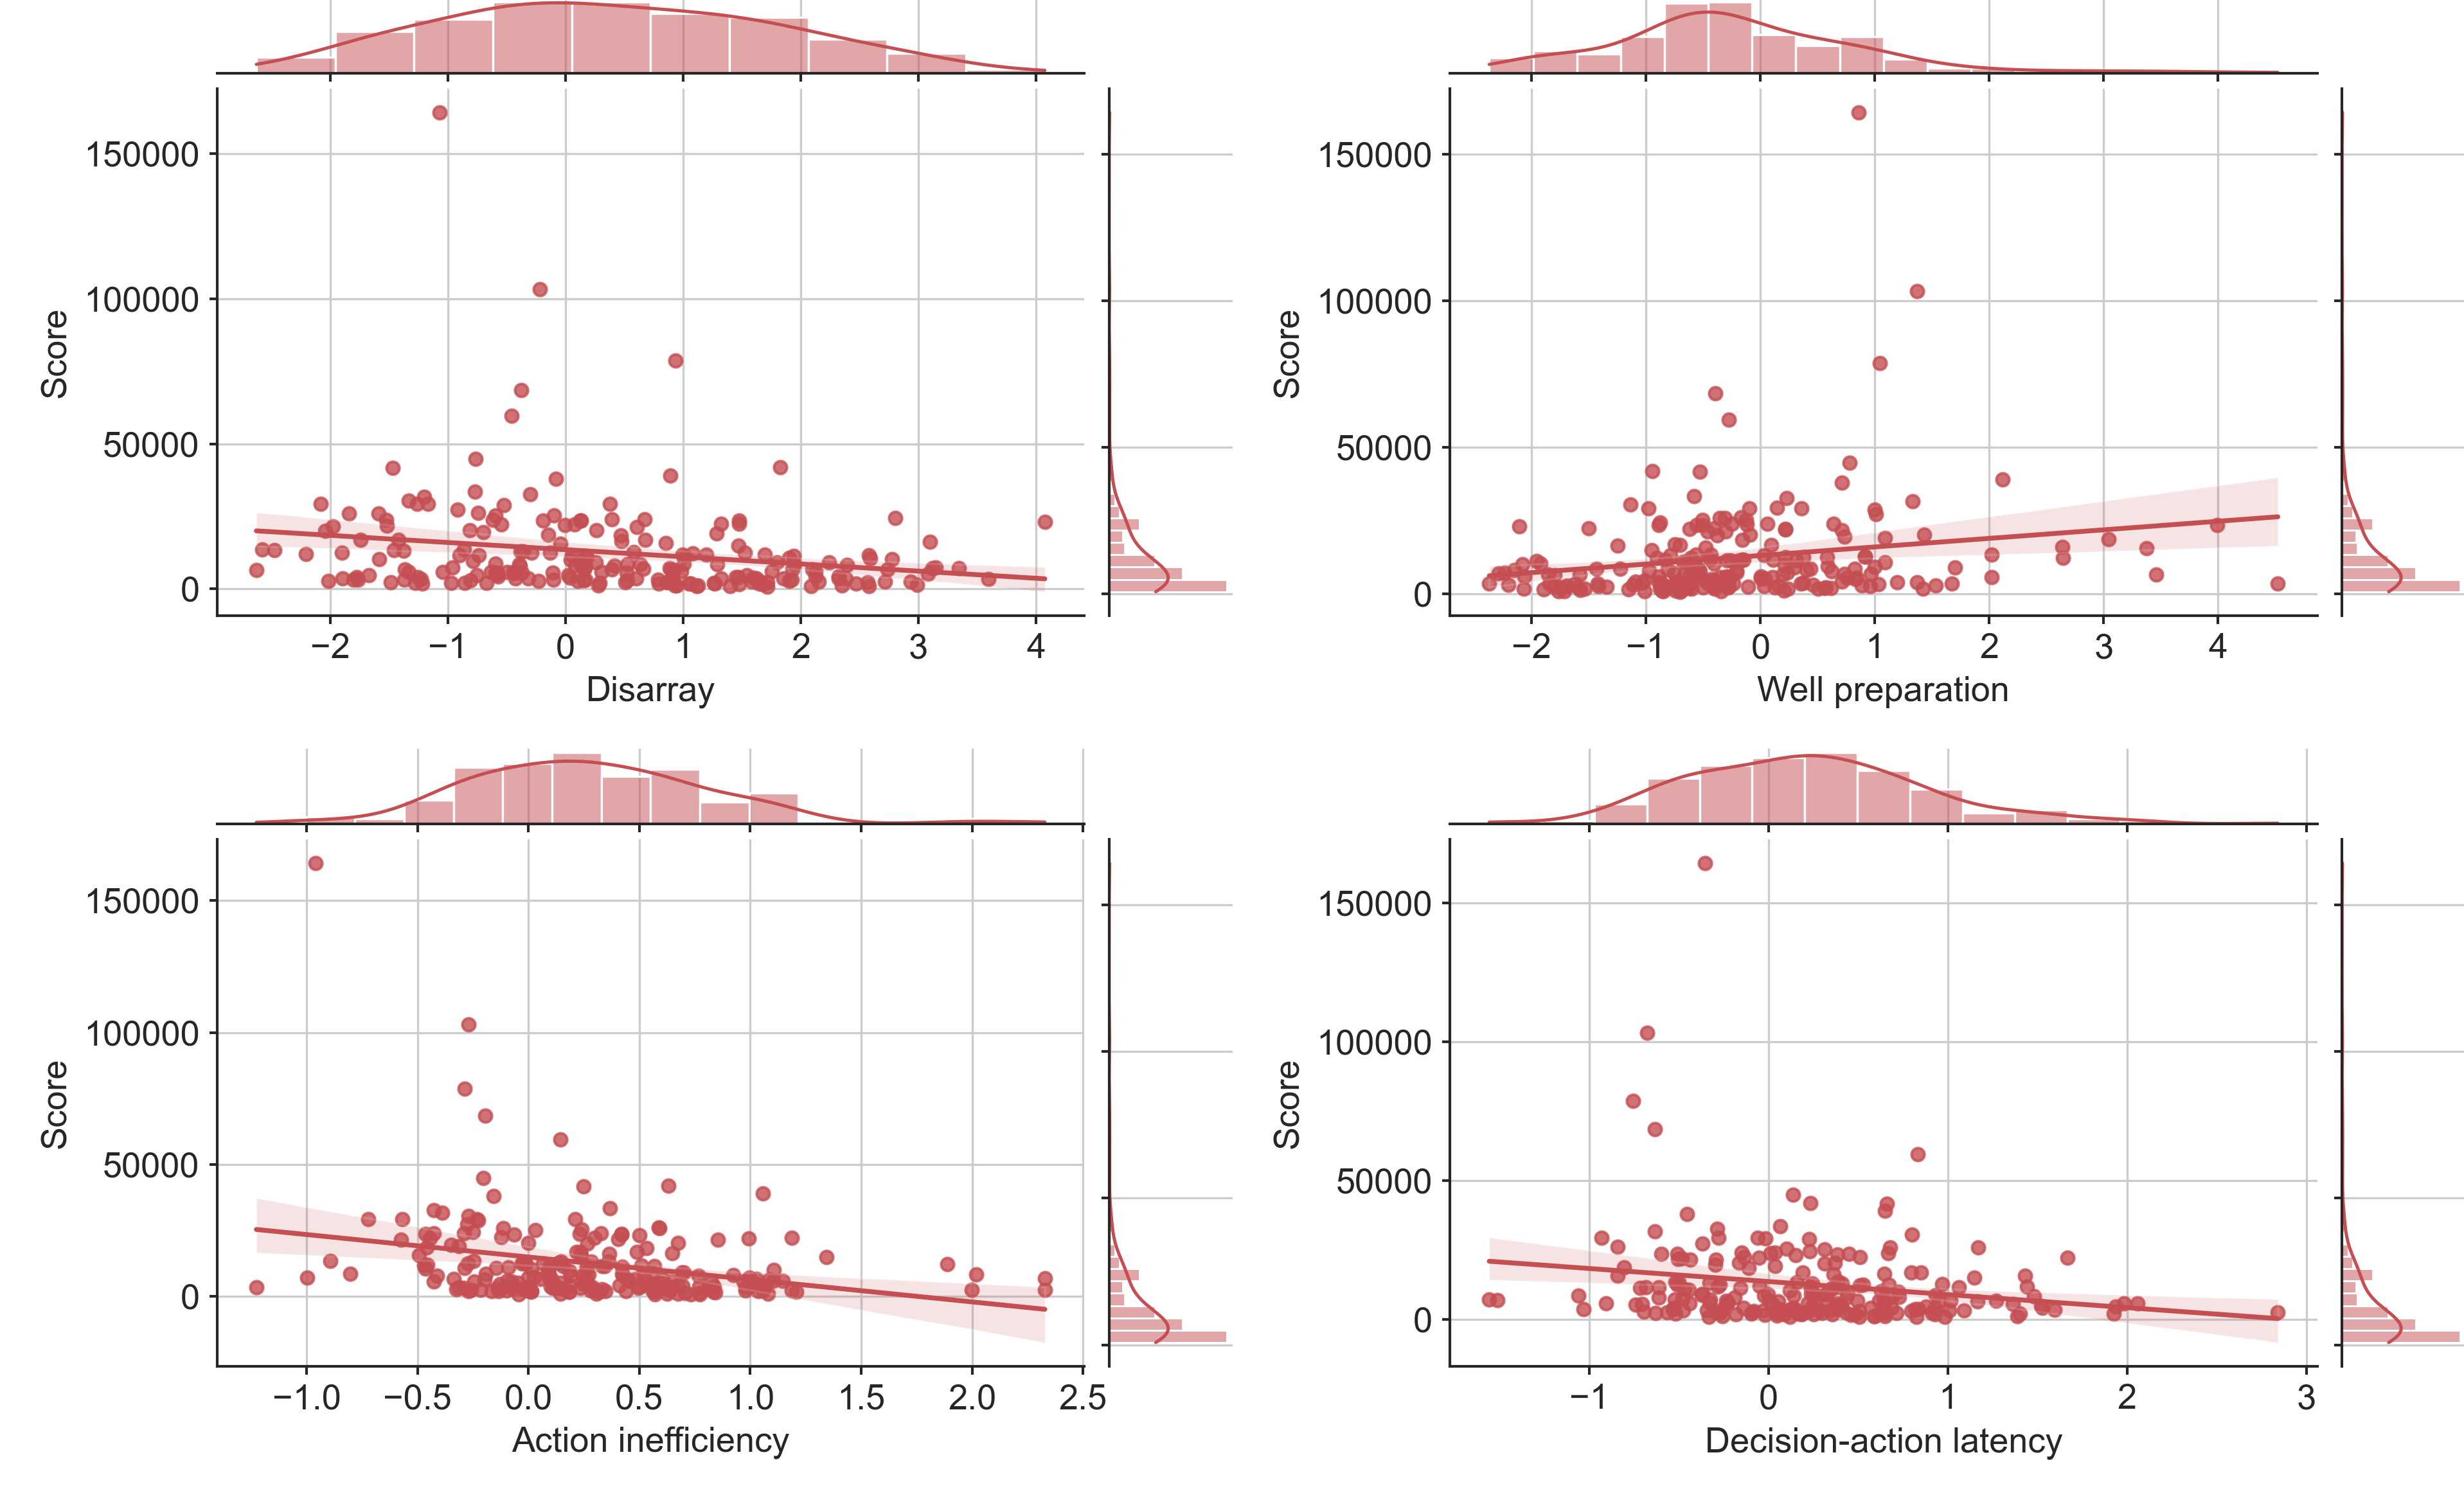

In [30]:
ax1 = sns.jointplot(x=pred_df['disarray_g1'], y=pred_df['final_score'], kind='reg')
ax2 = sns.jointplot(x=pred_df['well_prep_g1'], y=pred_df['final_score'], kind='reg')
ax3 = sns.jointplot(x=pred_df['act_inef_g1'], y=pred_df['final_score'], kind='reg')
ax4 = sns.jointplot(x=pred_df['dal_g1'], y=pred_df['final_score'], kind='reg')

fig = plt.figure(figsize=(13,8))
gs = gridspec.GridSpec(2, 2)

ax1.ax_joint.set_xlabel('Disarray')
ax2.ax_joint.set_xlabel('Well preparation')
ax3.ax_joint.set_xlabel('Action inefficiency')
ax4.ax_joint.set_xlabel('Decision-action latency')
for i in [ax1, ax2, ax3, ax4]:
    i.ax_joint.set_ylabel('Score')

mg0 = SeabornFig2Grid(ax1, fig, gs[0])
mg1 = SeabornFig2Grid(ax2, fig, gs[1])
mg2 = SeabornFig2Grid(ax3, fig, gs[2])
mg3 = SeabornFig2Grid(ax4, fig, gs[3])

gs.tight_layout(fig)
plt.show()

In [31]:
lm1 = pg.linear_regression(pred_df['disarray_g1'], pred_df['final_score'])
lm1

names       coef        se       T   pval     r2  adj_r2   CI[2.5%]  \
0    Intercept 13512.3075 1164.7004 11.6015 0.0000 0.0427  0.0382 11216.4922   
1  disarray_g1 -2465.3805  799.5013 -3.0836 0.0023 0.0427  0.0382 -4041.3286   

   CI[97.5%]  
0 15808.1228  
1  -889.4324

In [32]:
lm2 = pg.linear_regression(pred_df['well_prep_g1'], pred_df['final_score'])
lm2

names       coef        se       T   pval     r2  adj_r2   CI[2.5%]  \
0     Intercept 13159.8106 1144.5027 11.4983 0.0000 0.0389  0.0344 10903.8082   
1  well_prep_g1  2917.8336  993.4956  2.9369 0.0037 0.0389  0.0344   959.4910   

   CI[97.5%]  
0 15415.8129  
1  4876.1761

In [33]:
lm3 = pg.linear_regression(pred_df['act_inef_g1'], pred_df['final_score'])
lm3

names       coef        se       T   pval     r2  adj_r2    CI[2.5%]  \
0    Intercept 14973.3878 1235.2990 12.1213 0.0000 0.0797  0.0754  12538.4110   
1  act_inef_g1 -8508.5194 1981.1140 -4.2948 0.0000 0.0797  0.0754 -12413.6197   

   CI[97.5%]  
0 17408.3646  
1 -4603.4191

In [34]:
lm4 = pg.linear_regression(pred_df['dal_g1'], pred_df['final_score'])
lm4

names       coef        se       T   pval     r2  adj_r2   CI[2.5%]  \
0  Intercept 13607.6782 1187.1501 11.4625 0.0000 0.0354  0.0308 11267.6109   
1     dal_g1 -4690.4129 1678.5098 -2.7944 0.0057 0.0354  0.0308 -7999.0309   

   CI[97.5%]  
0 15947.7456  
1 -1381.7949

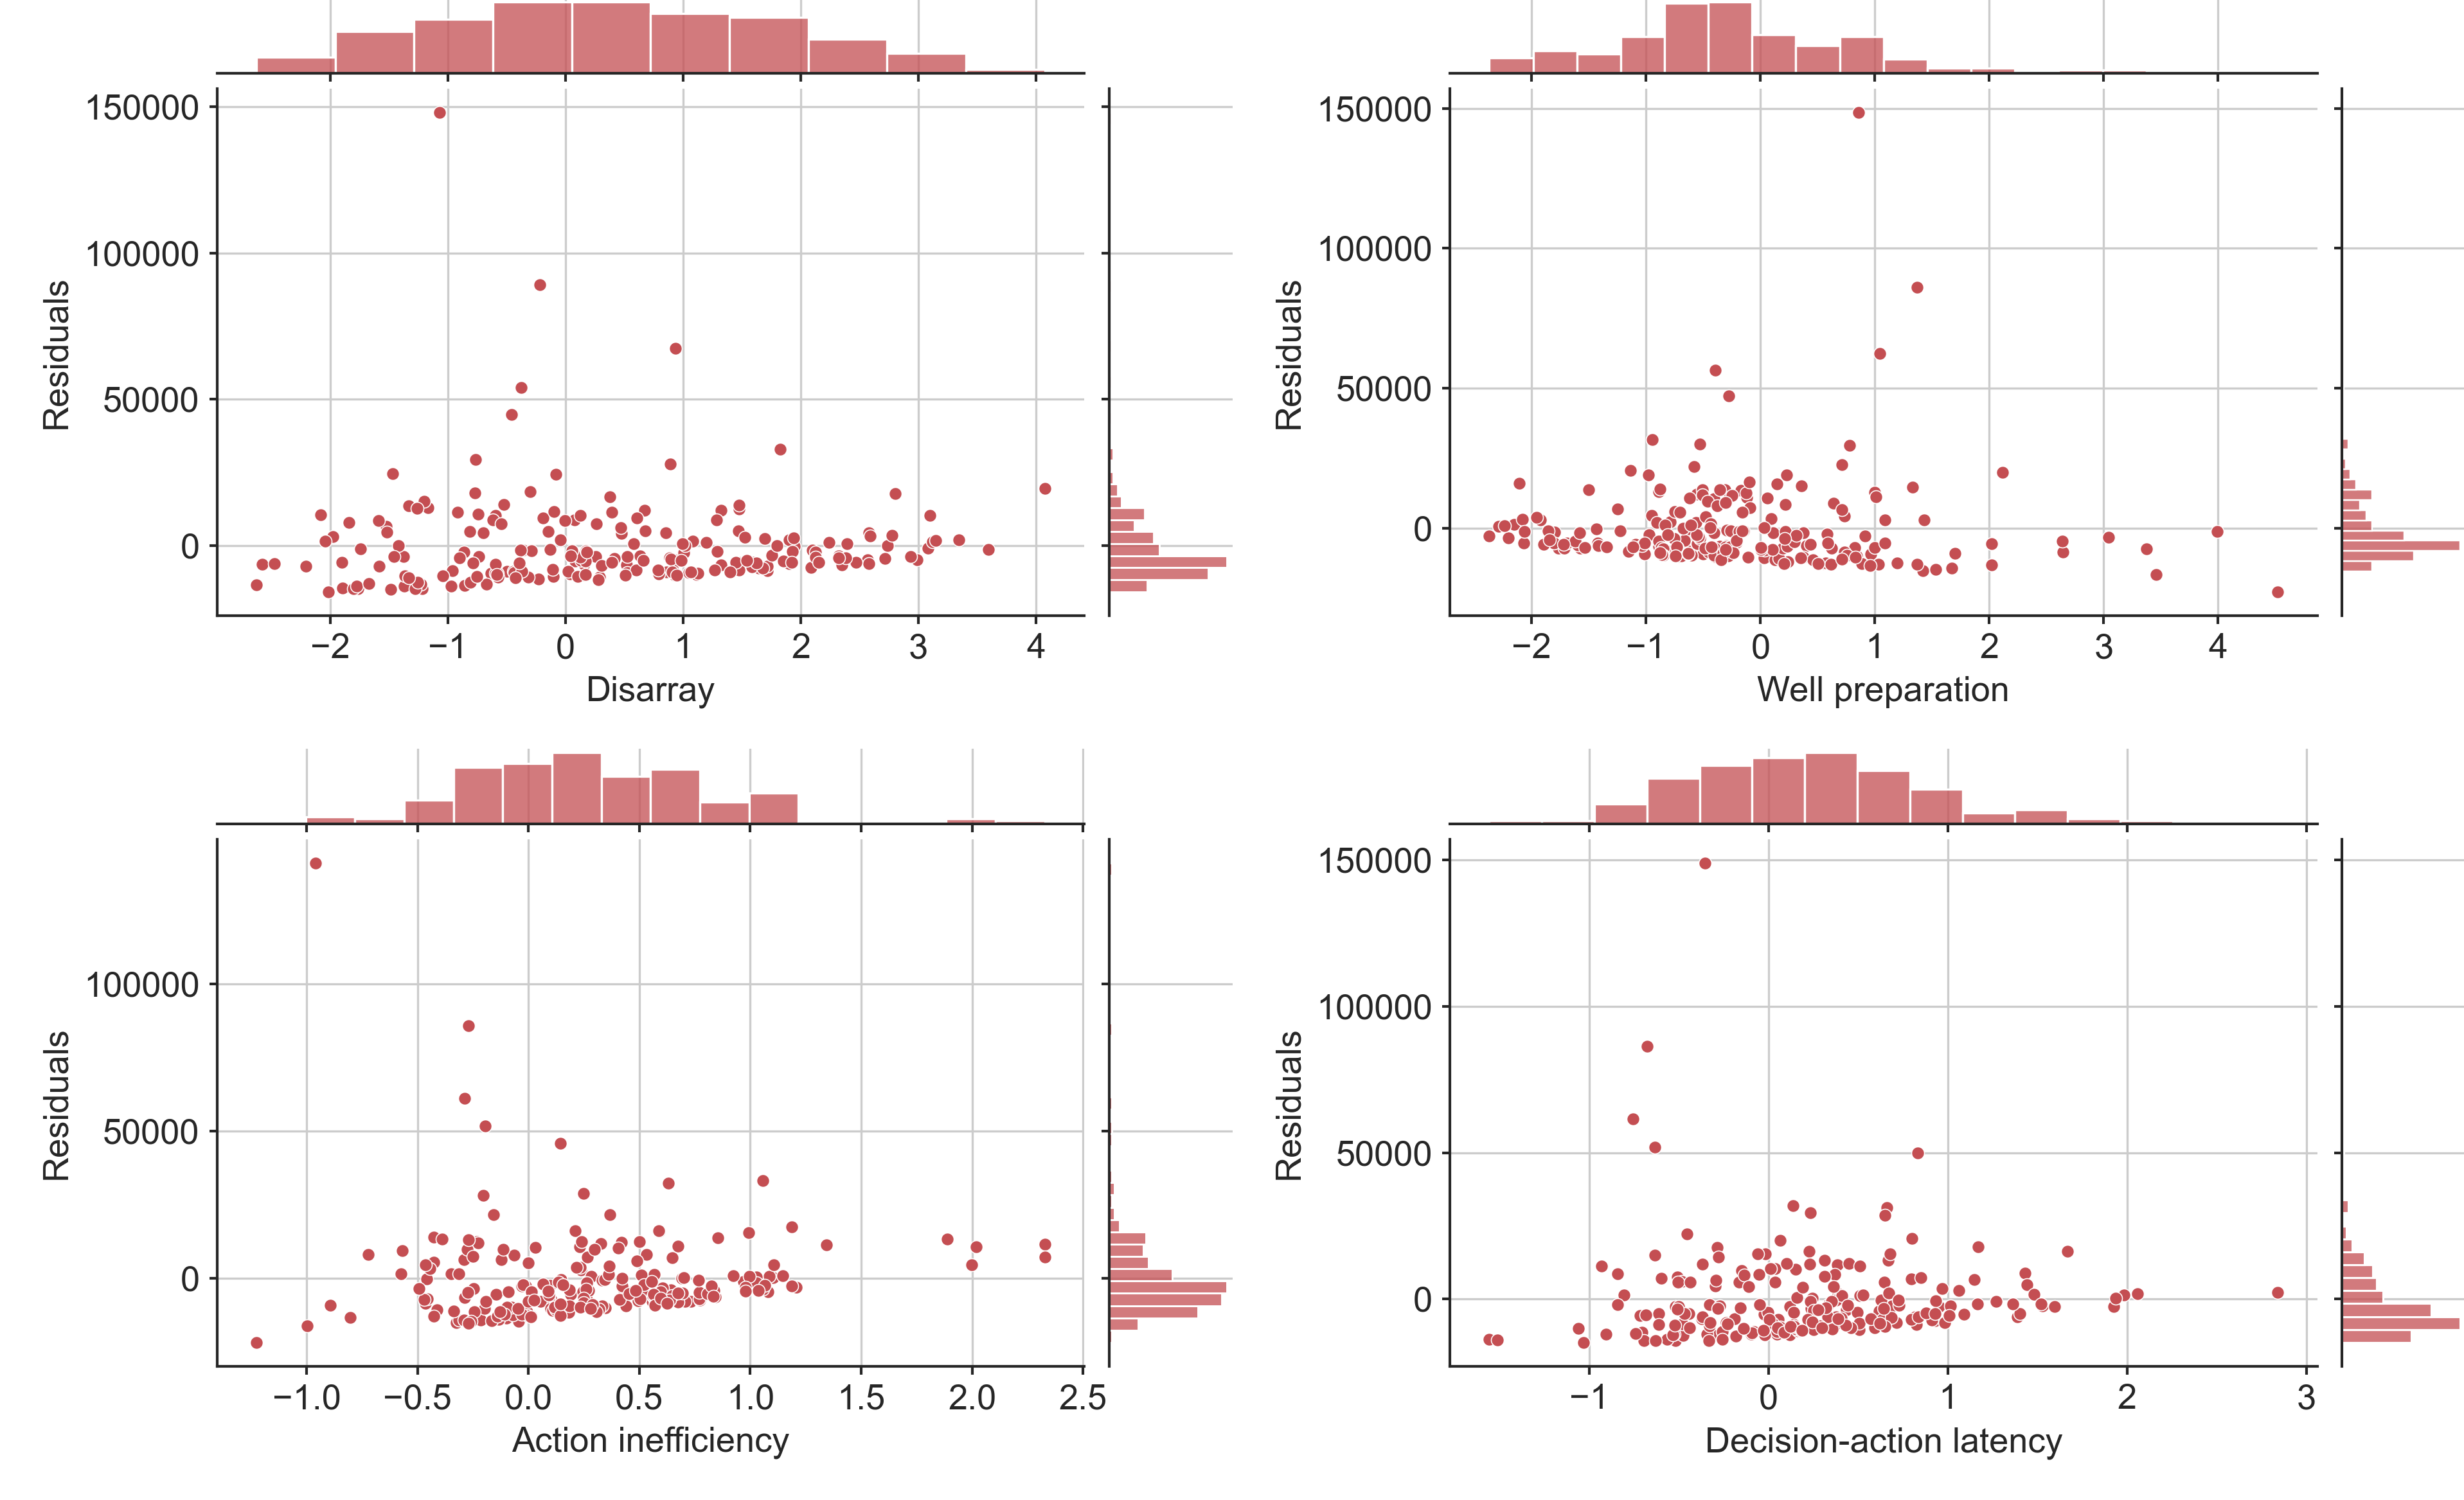

In [35]:
ax1 = sns.jointplot(x=pred_df['disarray_g1'], y=lm1.residuals_, kind='scatter')
ax2 = sns.jointplot(x=pred_df['well_prep_g1'], y=lm2.residuals_, kind='scatter')
ax3 = sns.jointplot(x=pred_df['act_inef_g1'], y=lm3.residuals_, kind='scatter')
ax4 = sns.jointplot(x=pred_df['dal_g1'], y=lm4.residuals_, kind='scatter')

fig = plt.figure(figsize=(13,8))
gs = gridspec.GridSpec(2, 2)

ax1.ax_joint.set_xlabel('Disarray')
ax2.ax_joint.set_xlabel('Well preparation')
ax3.ax_joint.set_xlabel('Action inefficiency')
ax4.ax_joint.set_xlabel('Decision-action latency')
for i in [ax1, ax2, ax3, ax4]:
    i.ax_joint.set_ylabel('Residuals')

mg0 = SeabornFig2Grid(ax1, fig, gs[0])
mg1 = SeabornFig2Grid(ax2, fig, gs[1])
mg2 = SeabornFig2Grid(ax3, fig, gs[2])
mg3 = SeabornFig2Grid(ax4, fig, gs[3])

gs.tight_layout(fig)
plt.show()

## Residuals do not have constant mean nor constant variance, repeat analysis after transforming DV to meet OLS assumptions 

In [36]:
import scipy.stats as stats
pred_df['final_score'] = stats.boxcox(pred_df['final_score'])[0]

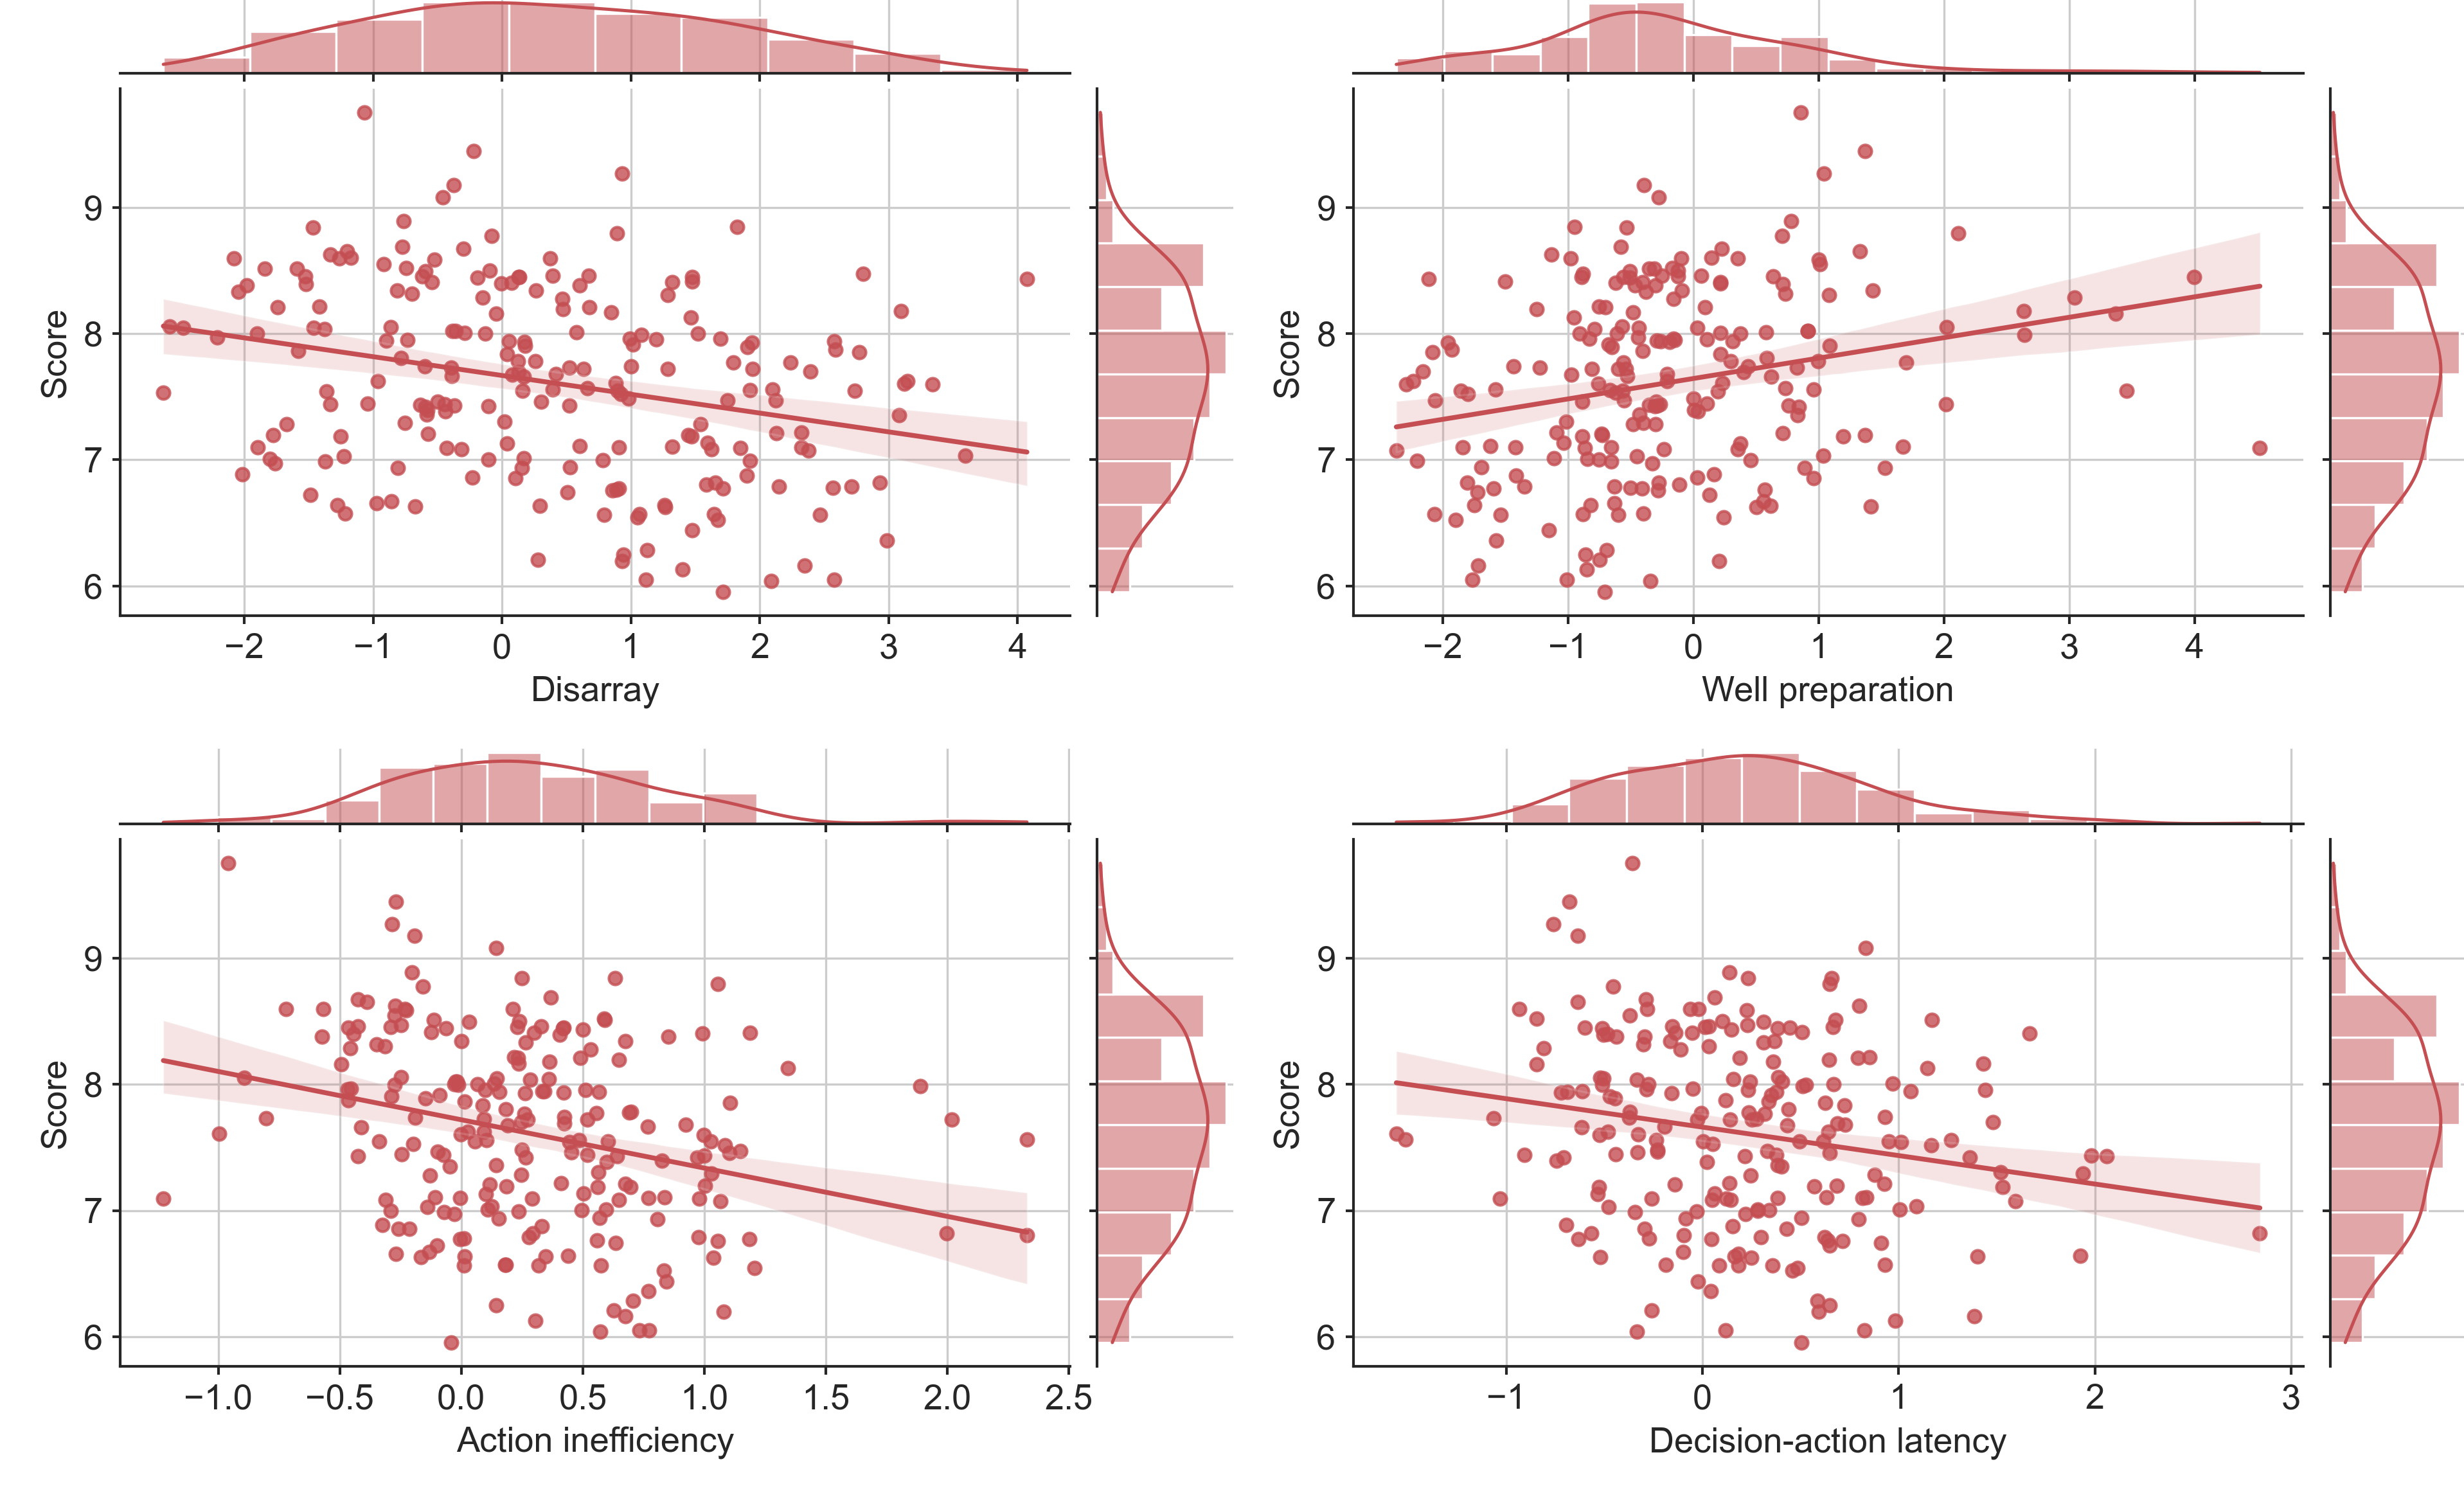

In [37]:
ax1 = sns.jointplot(x=pred_df['disarray_g1'], y=pred_df['final_score'], kind='reg')
ax2 = sns.jointplot(x=pred_df['well_prep_g1'], y=pred_df['final_score'], kind='reg')
ax3 = sns.jointplot(x=pred_df['act_inef_g1'], y=pred_df['final_score'], kind='reg')
ax4 = sns.jointplot(x=pred_df['dal_g1'], y=pred_df['final_score'], kind='reg')

fig = plt.figure(figsize=(13,8))
gs = gridspec.GridSpec(2, 2)

ax1.ax_joint.set_xlabel('Disarray')
ax2.ax_joint.set_xlabel('Well preparation')
ax3.ax_joint.set_xlabel('Action inefficiency')
ax4.ax_joint.set_xlabel('Decision-action latency')
for i in [ax1, ax2, ax3, ax4]:
    i.ax_joint.set_ylabel('Score')

mg0 = SeabornFig2Grid(ax1, fig, gs[0])
mg1 = SeabornFig2Grid(ax2, fig, gs[1])
mg2 = SeabornFig2Grid(ax3, fig, gs[2])
mg3 = SeabornFig2Grid(ax4, fig, gs[3])

gs.tight_layout(fig)
plt.show()

#### Dependent variable very positively skewed and contains multiple outliers, mostly as a product of the scoring system

In [38]:
lm1 = pg.linear_regression(pred_df['disarray_g1'], pred_df['final_score'])
lm1

names    coef     se        T   pval     r2  adj_r2  CI[2.5%]  \
0    Intercept  7.6684 0.0506 151.6413 0.0000 0.0796  0.0752    7.5687   
1  disarray_g1 -0.1490 0.0347  -4.2911 0.0000 0.0796  0.0752   -0.2174   

   CI[97.5%]  
0     7.7680  
1    -0.0805

In [39]:
lm2 = pg.linear_regression(pred_df['well_prep_g1'], pred_df['final_score'])
lm2

names   coef     se        T   pval     r2  adj_r2  CI[2.5%]  \
0     Intercept 7.6442 0.0501 152.6063 0.0000 0.0610  0.0566    7.5455   
1  well_prep_g1 0.1617 0.0435   3.7198 0.0003 0.0610  0.0566    0.0760   

   CI[97.5%]  
0     7.7430  
1     0.2475

In [40]:
lm3 = pg.linear_regression(pred_df['act_inef_g1'], pred_df['final_score'])
lm3

names    coef     se        T   pval     r2  adj_r2  CI[2.5%]  \
0    Intercept  7.7199 0.0546 141.3358 0.0000 0.0823  0.0779    7.6122   
1  act_inef_g1 -0.3828 0.0876  -4.3694 0.0000 0.0823  0.0779   -0.5554   

   CI[97.5%]  
0     7.8276  
1    -0.2101

In [41]:
lm4 = pg.linear_regression(pred_df['dal_g1'], pred_df['final_score'])
lm4

names    coef     se        T   pval     r2  adj_r2  CI[2.5%]  \
0  Intercept  7.6616 0.0524 146.2326 0.0000 0.0417  0.0372    7.5583   
1     dal_g1 -0.2254 0.0741  -3.0432 0.0026 0.0417  0.0372   -0.3715   

   CI[97.5%]  
0     7.7649  
1    -0.0794

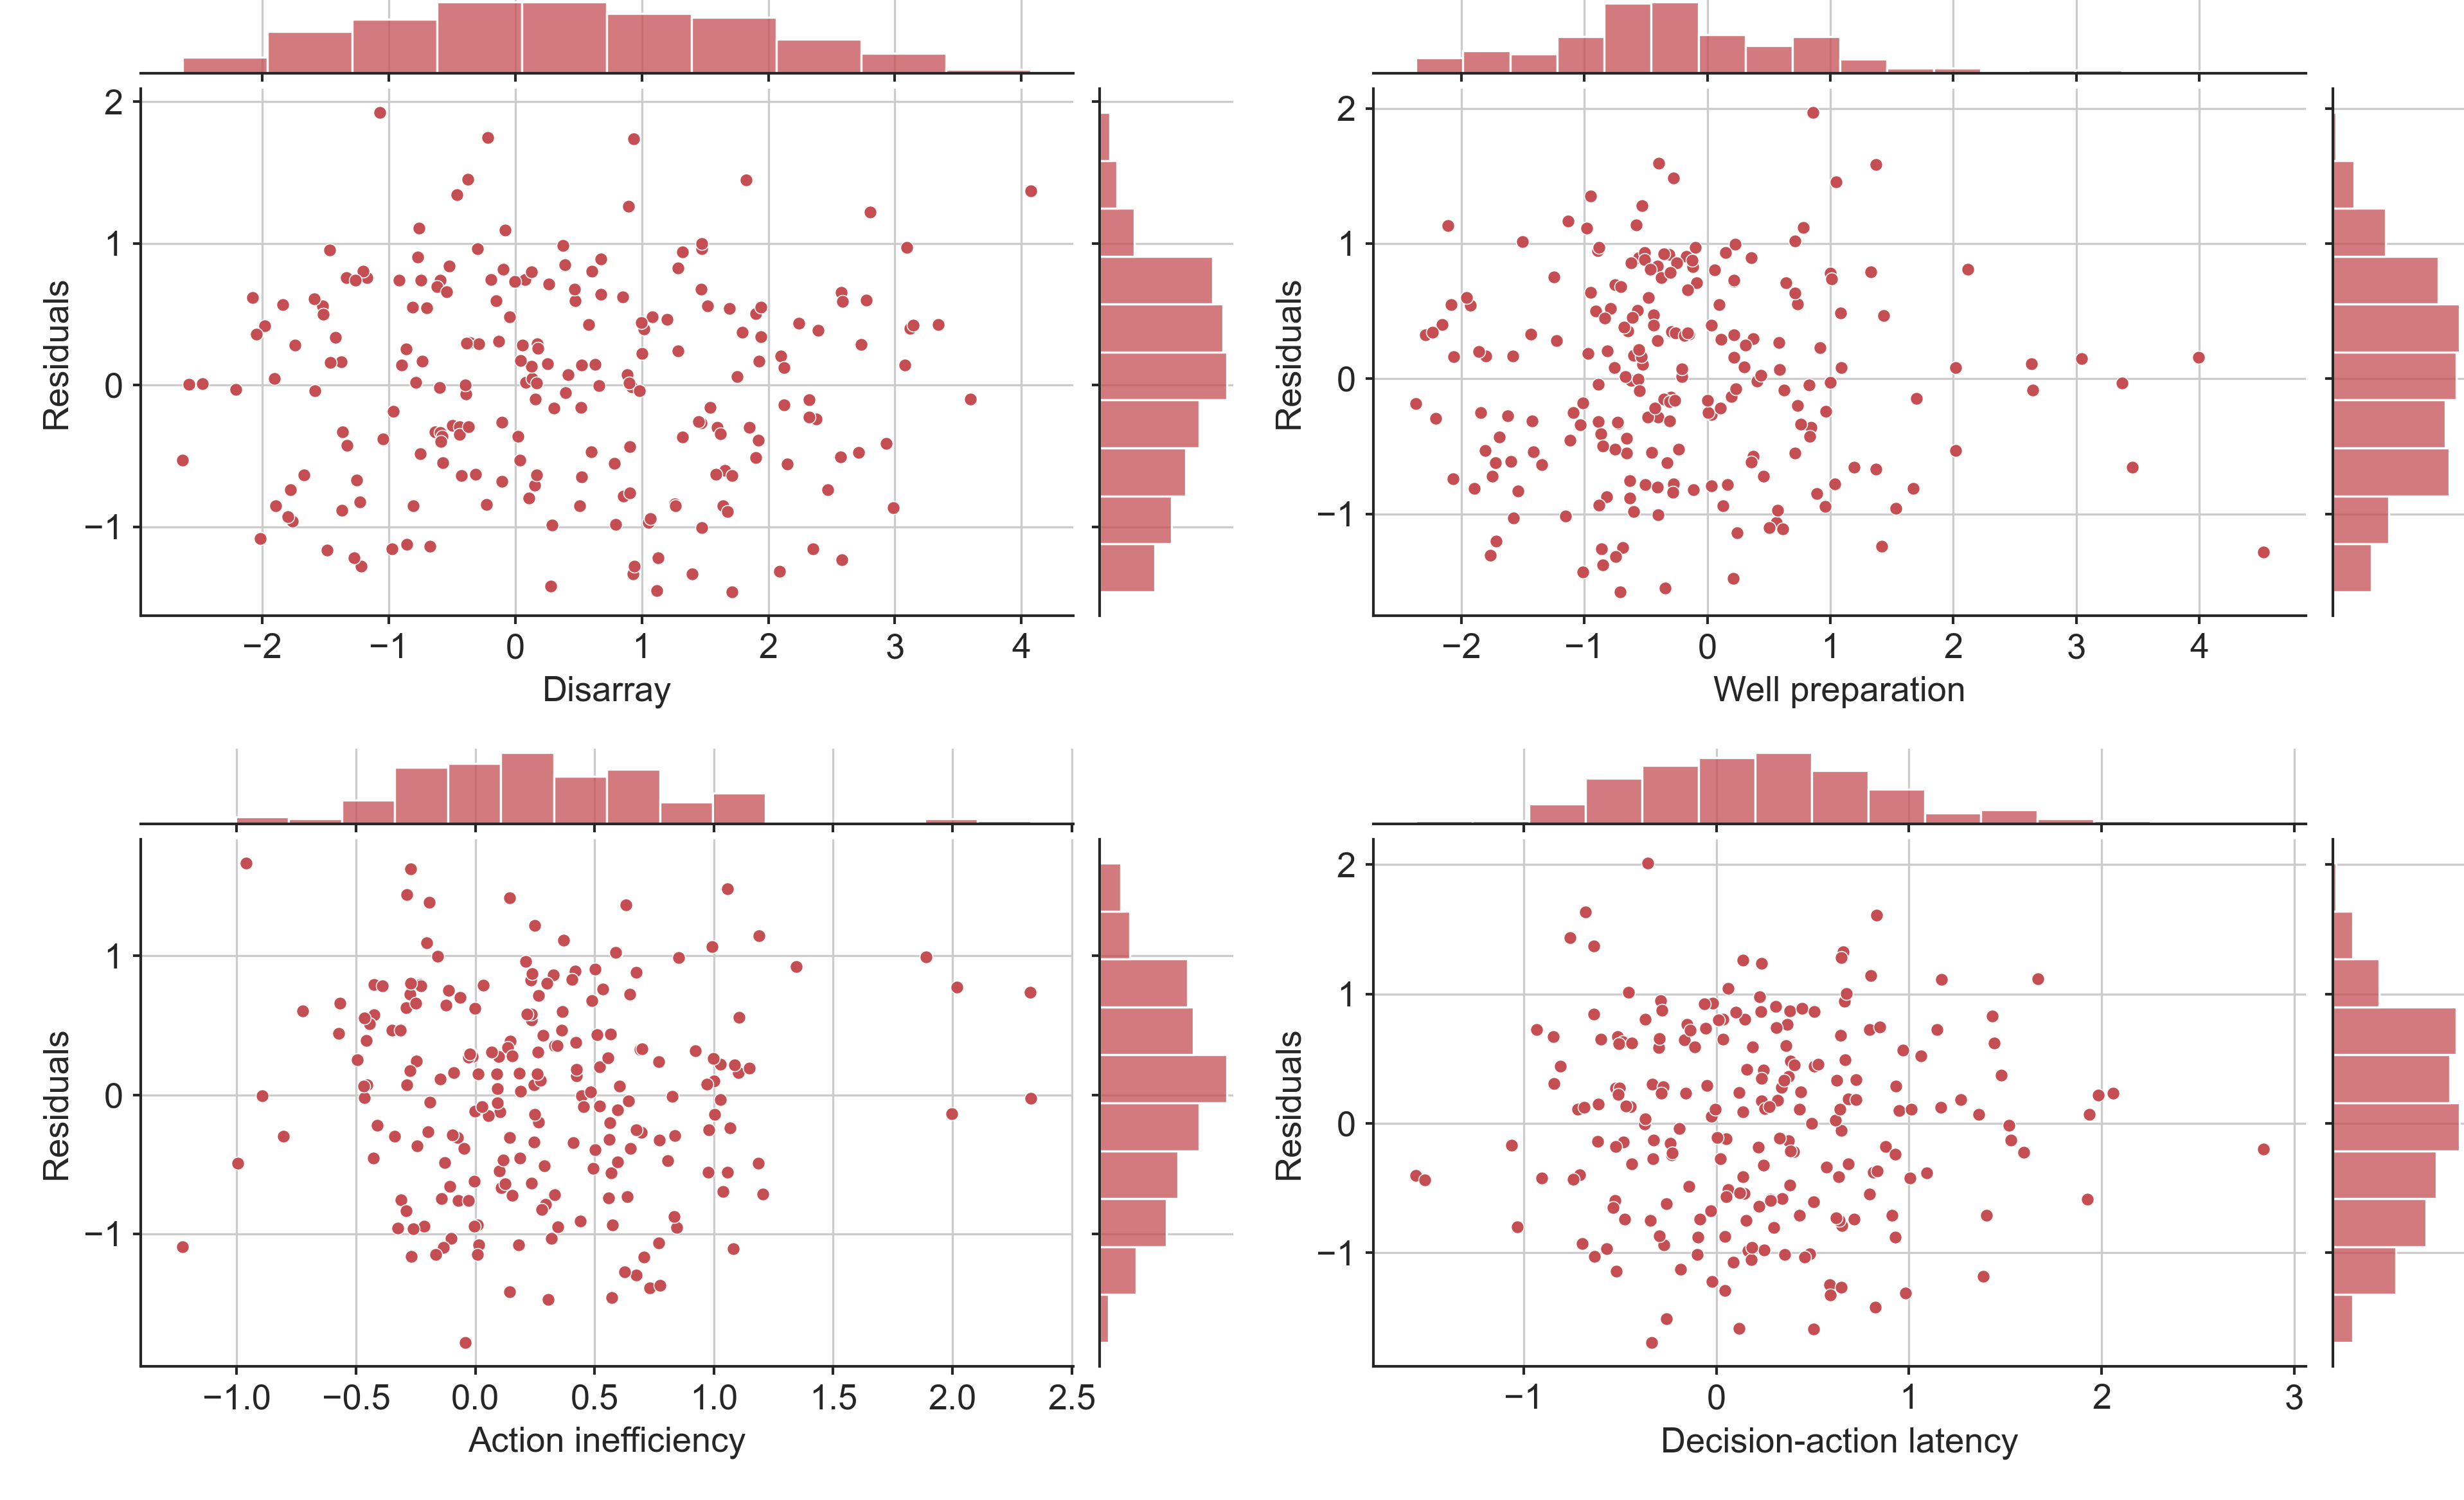

In [42]:
ax1 = sns.jointplot(x=pred_df['disarray_g1'], y=lm1.residuals_, kind='scatter')
ax2 = sns.jointplot(x=pred_df['well_prep_g1'], y=lm2.residuals_, kind='scatter')
ax3 = sns.jointplot(x=pred_df['act_inef_g1'], y=lm3.residuals_, kind='scatter')
ax4 = sns.jointplot(x=pred_df['dal_g1'], y=lm4.residuals_, kind='scatter')

fig = plt.figure(figsize=(13,8))
gs = gridspec.GridSpec(2, 2)

ax1.ax_joint.set_xlabel('Disarray')
ax2.ax_joint.set_xlabel('Well preparation')
ax3.ax_joint.set_xlabel('Action inefficiency')
ax4.ax_joint.set_xlabel('Decision-action latency')
for i in [ax1, ax2, ax3, ax4]:
    i.ax_joint.set_ylabel('Residuals')

mg0 = SeabornFig2Grid(ax1, fig, gs[0])
mg1 = SeabornFig2Grid(ax2, fig, gs[1])
mg2 = SeabornFig2Grid(ax3, fig, gs[2])
mg3 = SeabornFig2Grid(ax4, fig, gs[3])

gs.tight_layout(fig)
plt.show()

## We know these components are correlated with one another - we enter them into a multiple regression model here

In [43]:
lm5 = pg.linear_regression(pred_df[['disarray_g1', 'well_prep_g1', 'act_inef_g1', 'dal_g1']], pred_df['final_score'], relimp=True)
lm5

names    coef     se        T   pval     r2  adj_r2  CI[2.5%]  \
0     Intercept  7.7422 0.0538 143.9752 0.0000 0.1439  0.1276    7.6362   
1   disarray_g1 -0.0973 0.0364  -2.6701 0.0082 0.1439  0.1276   -0.1691   
2  well_prep_g1  0.0826 0.0459   1.7991 0.0734 0.1439  0.1276   -0.0079   
3   act_inef_g1 -0.2107 0.0978  -2.1541 0.0324 0.1439  0.1276   -0.4036   
4        dal_g1 -0.0837 0.0785  -1.0653 0.2880 0.1439  0.1276   -0.2385   

   CI[97.5%]  relimp  relimp_perc  
0     7.8483     NaN          NaN  
1    -0.0255  0.0494      34.3641  
2     0.1731  0.0315      21.8992  
3    -0.0179  0.0445      30.9485  
4     0.0712  0.0184      12.7883

/home/ozvar/Dropbox/venvs/hmm_analysis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


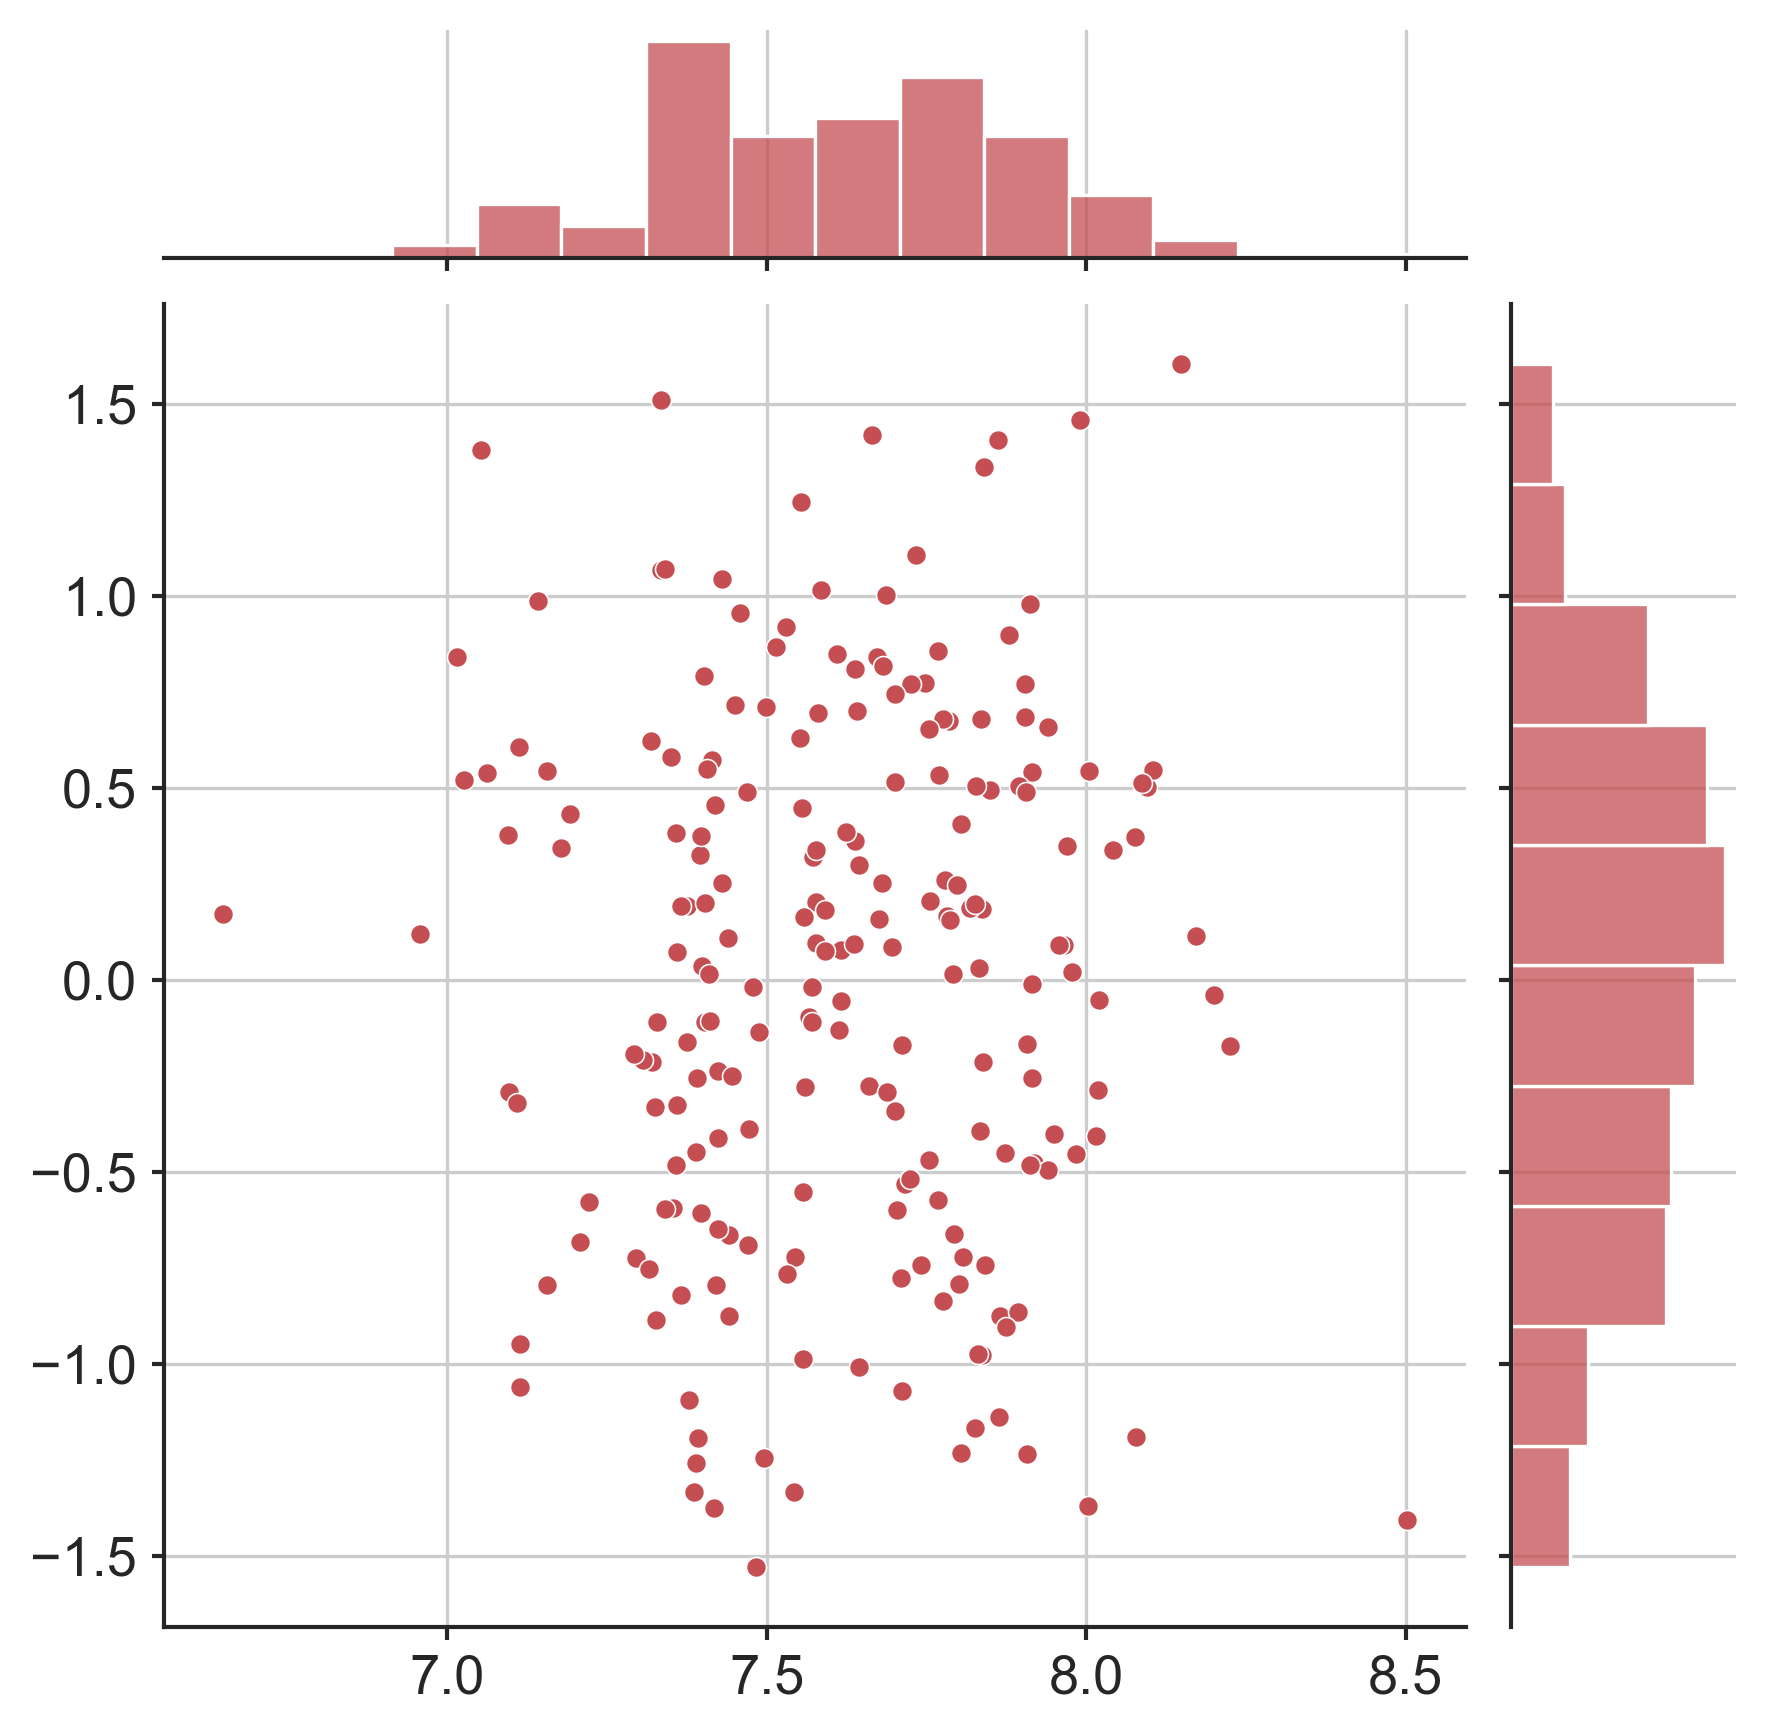

In [44]:
lm5 = pg.linear_regression(pred_df[['disarray_g1', 'well_prep_g1', 'act_inef_g1', 'dal_g1']], pred_df['final_score'], as_dataframe=False, relimp=True)

sns.jointplot(lm5['pred'], lm5['residuals'])
plt.show()

In [45]:
lm5 = pg.linear_regression(pred_df[['disarray_g1', 'well_prep_g1', 'act_inef_g1', 'dal_g1', 'first_score']], pred_df['final_score'], relimp=True)
lm5

names    coef     se       T   pval     r2  adj_r2  CI[2.5%]  \
0     Intercept  7.4382 0.0815 91.2705 0.0000 0.2286  0.2102    7.2776   
1   disarray_g1 -0.0302 0.0374 -0.8089 0.4195 0.2286  0.2102   -0.1039   
2  well_prep_g1  0.0774 0.0437  1.7716 0.0779 0.2286  0.2102   -0.0087   
3   act_inef_g1 -0.0355 0.1000 -0.3550 0.7229 0.2286  0.2102   -0.2326   
4        dal_g1 -0.0313 0.0755 -0.4142 0.6791 0.2286  0.2102   -0.1802   
5   first_score  0.0000 0.0000  4.7928 0.0000 0.2286  0.2102    0.0000   

   CI[97.5%]  relimp  relimp_perc  
0     7.5989     NaN          NaN  
1     0.0435  0.0305      13.3195  
2     0.1636  0.0264      11.5396  
3     0.1616  0.0280      12.2659  
4     0.1176  0.0130       5.6745  
5     0.0000  0.1308      57.2004

## Can we classify players using a combination of their factor scores?